# Importing the libraries

In [1]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Import packages for remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import r2_score

from sklearn import linear_model

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

#Feture scaling
from sklearn.preprocessing import StandardScaler

# Functions definitions used in the analysis or ploting the graphs.


In [3]:
#Function to plot a list of categorical variables together
def box_plot(colname):
    plt.figure(figsize=(18, 35))
    for var in colname:
        plt.subplot(5,2,colname.index(var)+1)
        sns.boxplot(x = var, y = 'SalePrice', data = housing_data)
    plt.show()

In [4]:
# Custom function.
# Frequency of each feature in percentage.
def bar_plot_percentage(df, colnames, sortbyindex=False):
    fig = plt.figure(figsize=(20, 50))
    fig.set_facecolor("lightgrey")
    string = "Frequency of "
    for colname in colnames:
        plt.subplot(5,2,colnames.index(colname)+1)
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette('dark'))
        plt.xticks(rotation = 70,fontsize=14,family="Comic Sans MS")
        plt.yticks(fontsize=14,family="Comic Sans MS")
        plt.ylabel(string, fontsize=14,family = "Comic Sans MS")
        plt.xlabel(colname, fontsize=14,family = "Comic Sans MS")
        string = "Frequency of "

In [5]:
#Function to plot a boxplot
def box_plot_num(df,colname):
    plt.figure(figsize=(20, 15))
    for var in colname:
        print(var)
        plt.subplot(2,2,colname.index(var)+1)
        sns.boxplot(x = var, data = df)
        plt.xlabel(var, fontsize=12,family = "Comic Sans MS")
    plt.show()

# Glimpse of Data
 - Loading "./train.csv"
 - How many Rows and Columns
 - Getting the names of the Columns of Housing data
 - Removing duplicates if any

In [6]:
housing_data = pd.read_csv("./train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
housing_data.shape

(1460, 81)

In [8]:
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Dropping Duplicates if any
housing_data=housing_data.drop_duplicates()
housing_data.shape

# No duplicates found.

(1460, 81)

## Handling Data
- Checking missing values and removal of unwanted columns
- Removing the data based on uniqueness of the data

## Lets have a closer look to other Null values.

In [10]:
#Identifying Missing data
total_null = housing_data.isnull().sum().sort_values(ascending = False)
percent = ((housing_data.isnull().sum()/housing_data.isnull().count())*100).sort_values(ascending = False)
print("Total records (Housing Data) = ", housing_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(20)

Total records (Housing Data) =  1460


,Total Missing,In Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


# Inferences

 - Dropping **PoolQC ,MiscFeature , Alley & Fence** since more than 80% missing value

In [11]:
#dropping PoolQC ,MiscFeature , Alley & Fence since more than 80% missing value
housing_data.drop(['PoolQC', 'MiscFeature','Alley','Fence'], 1, inplace = True)

In [12]:
housing_data.shape

(1460, 77)

## Handling Missing values related to Basement

In [13]:
bsmt_colnames = ['BsmtQual','BsmtExposure','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
cat_bsmt_colnames = ['BsmtQual','BsmtExposure','BsmtCond','BsmtFinType1','BsmtFinType2']
num_bsmt_colnames = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']
housing_data[cat_bsmt_colnames].describe()

,BsmtQual,BsmtExposure,BsmtCond,BsmtFinType1,BsmtFinType2
count,1423,1422,1423,1423,1422
unique,4,4,4,6,6
top,TA,No,TA,Unf,Unf
freq,649,953,1311,430,1256


In [14]:
#Identifying Missing data
total_null = housing_data[bsmt_colnames].isnull().sum().sort_values(ascending = False)
percent = ((housing_data[bsmt_colnames].isnull().sum()/housing_data[bsmt_colnames].isnull().count())*100).sort_values(ascending = False)
print("Total records (Basement Data) = ", housing_data[bsmt_colnames].shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(20)

Total records (Basement Data) =  1460


,Total Missing,In Percent
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53
BsmtFinSF1,0,0.00
BsmtFinSF2,0,0.00
BsmtUnfSF,0,0.00
TotalBsmtSF,0,0.00


## Inferences 

- Based on the Data description NA is equal to No Basement. Hence setting all NA values as No Basement.

In [15]:
#Cleaning up variable BsmtQual, BsmtExposure, BsmtCond, BsmtFinType1 & BsmtFinType2 (Replacing NA => No Basement) to reduce the features
housing_data['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)
housing_data['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)
housing_data['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)
housing_data['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
housing_data['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)

In [19]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

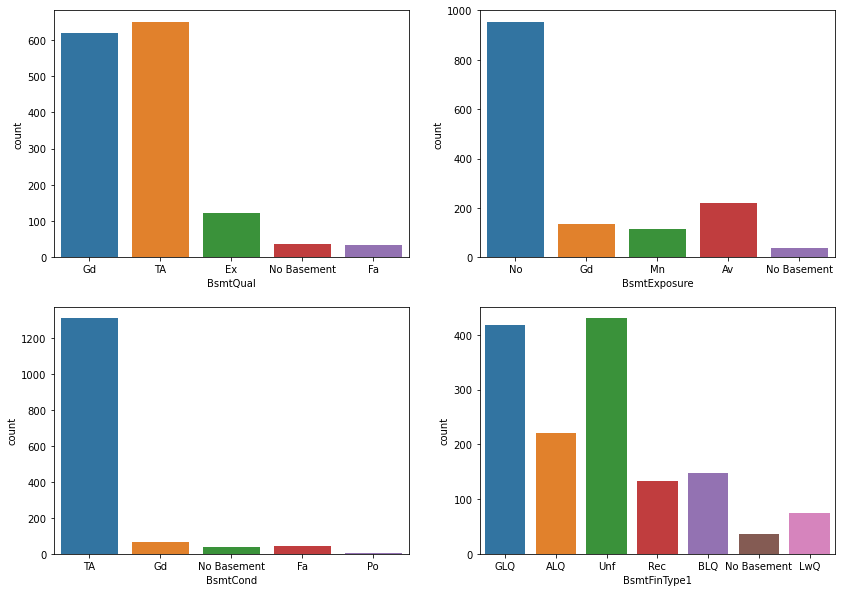

In [18]:
colnames = ['BsmtQual','BsmtExposure','BsmtCond','BsmtFinType1']
##,'BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
nrow = 2
ncols = 2
pltcounter = 1
fig = plt.figure(figsize=(14,10))

for colname in colnames:
    plt.subplot(nrow,ncols,pltcounter)
    sns.countplot(housing_data[colname])
    pltcounter += 1
    
plt.show()

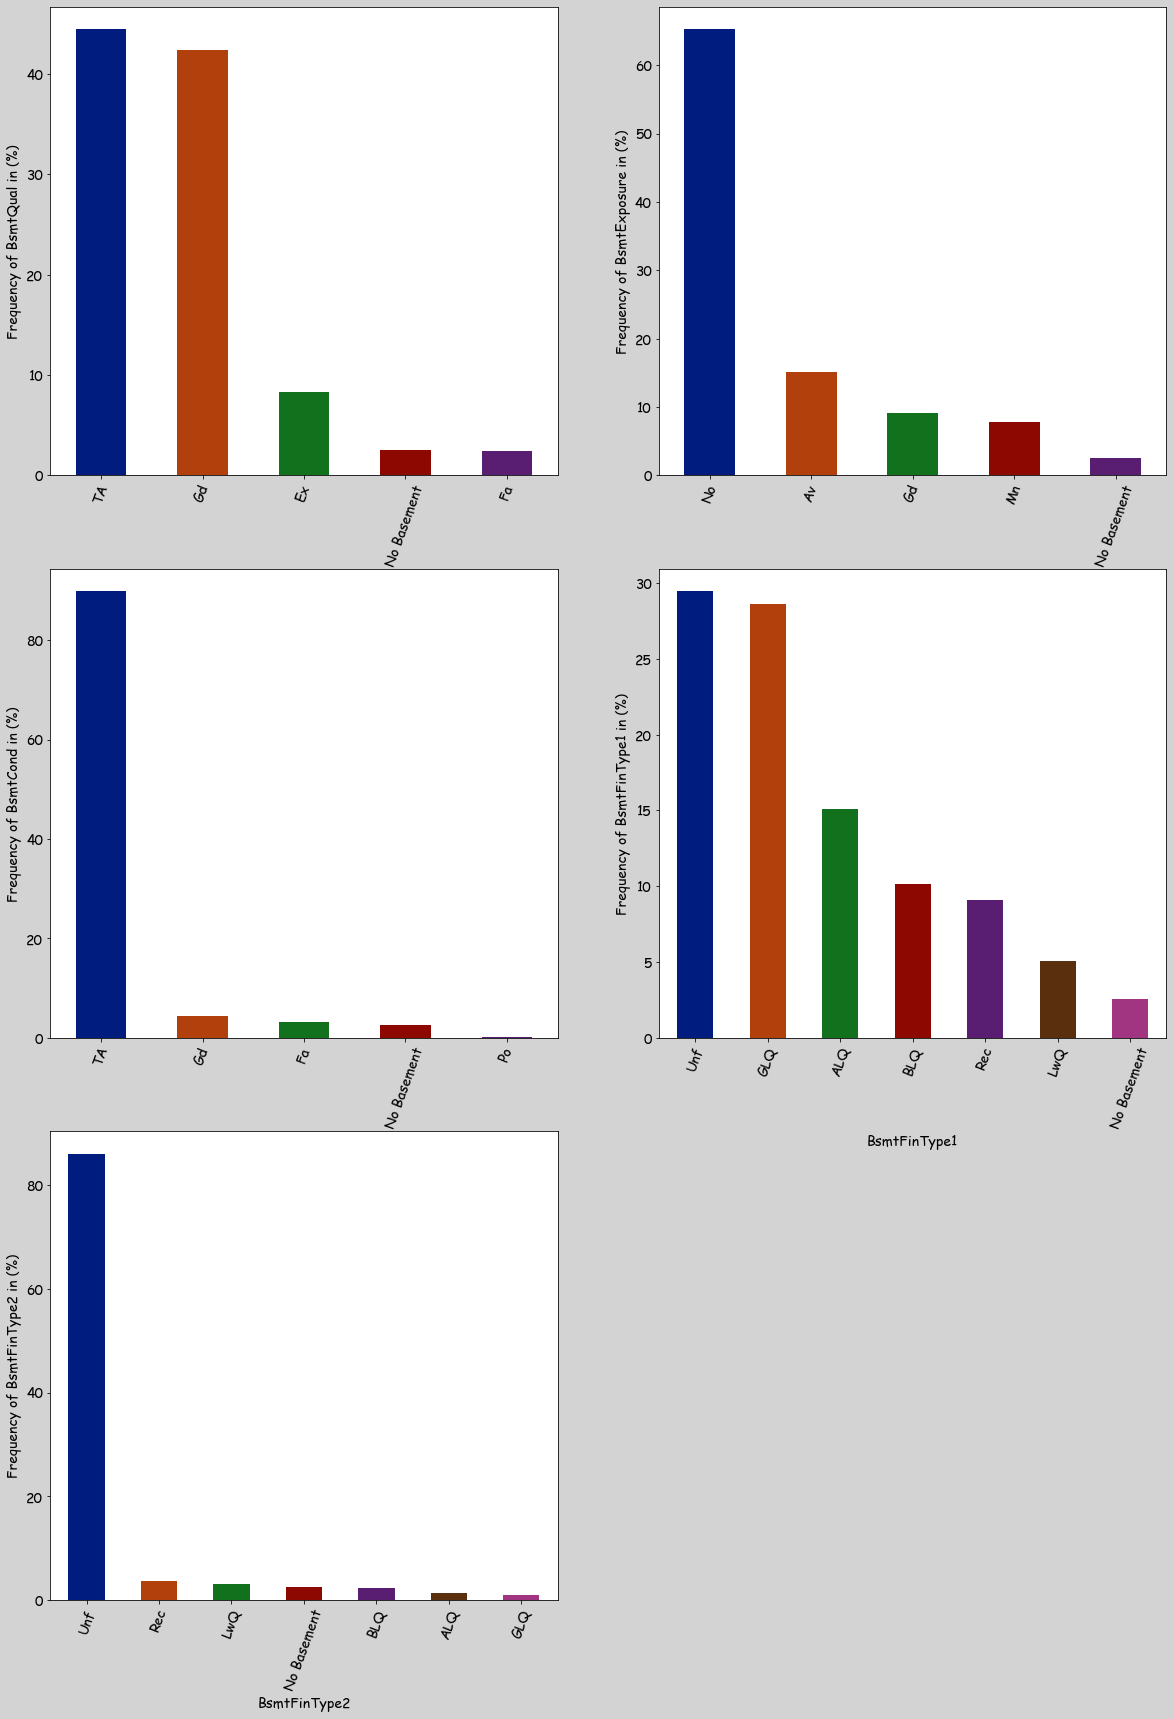

In [16]:
bar_plot_percentage(housing_data,cat_bsmt_colnames)

## Inferences

From the above graphs -
- BsmtQual :- Fair and No basement can be combined as "Others"
- BsmtCond :- Fair (Fa), Typical (TA) & Good (Gd) can be combined as OK.
- BsmtCond :- Poor (Po) & No Basement are similar. They can be combined as NOK.
- BsmtFinType2 :- Rec,LwQ, BLQ, ALQ,GLQ are set to Others
- BsmtFinType2 :- No Basement are set to Unf

In [272]:
#Cleaning up variable BsmtQual
# Two levels Fair and No basement can be combined as "Others"
housing_data['BsmtQual'].replace({'Fa':'Others'},inplace=True)
housing_data['BsmtQual'].replace({'No Basement':'Others'},inplace=True)

In [273]:
#Cleaning up variable BsmtCond
# Fa (Fair), TA (Typical) & Gd (Good) can be combined as OK.
housing_data['BsmtCond'].replace({'Fa':'OK'},inplace=True)
housing_data['BsmtCond'].replace({'TA':'OK'},inplace=True)
housing_data['BsmtCond'].replace({'Gd':'OK'},inplace=True)

# Po (Poor) and No Basement are similar and are levels of poor quality. They can be combined as NOK.
housing_data['BsmtCond'].replace({'Po':'NOK'},inplace=True)
housing_data['BsmtCond'].replace({'No Basement':'NOK'},inplace=True)

In [274]:
#Cleaning up variable BsmtFinType2
# Fa (Fair), TA (Typical) & Gd (Good) can be combined as OK.
housing_data['BsmtFinType2'].replace({'No Basement':'Unf'},inplace=True)

housing_data['BsmtFinType2'].replace({'Rec':'Others'},inplace=True)
housing_data['BsmtFinType2'].replace({'LwQ':'Others'},inplace=True)
housing_data['BsmtFinType2'].replace({'BLQ':'Others'},inplace=True)
housing_data['BsmtFinType2'].replace({'ALQ':'Others'},inplace=True)
housing_data['BsmtFinType2'].replace({'GLQ':'Others'},inplace=True)

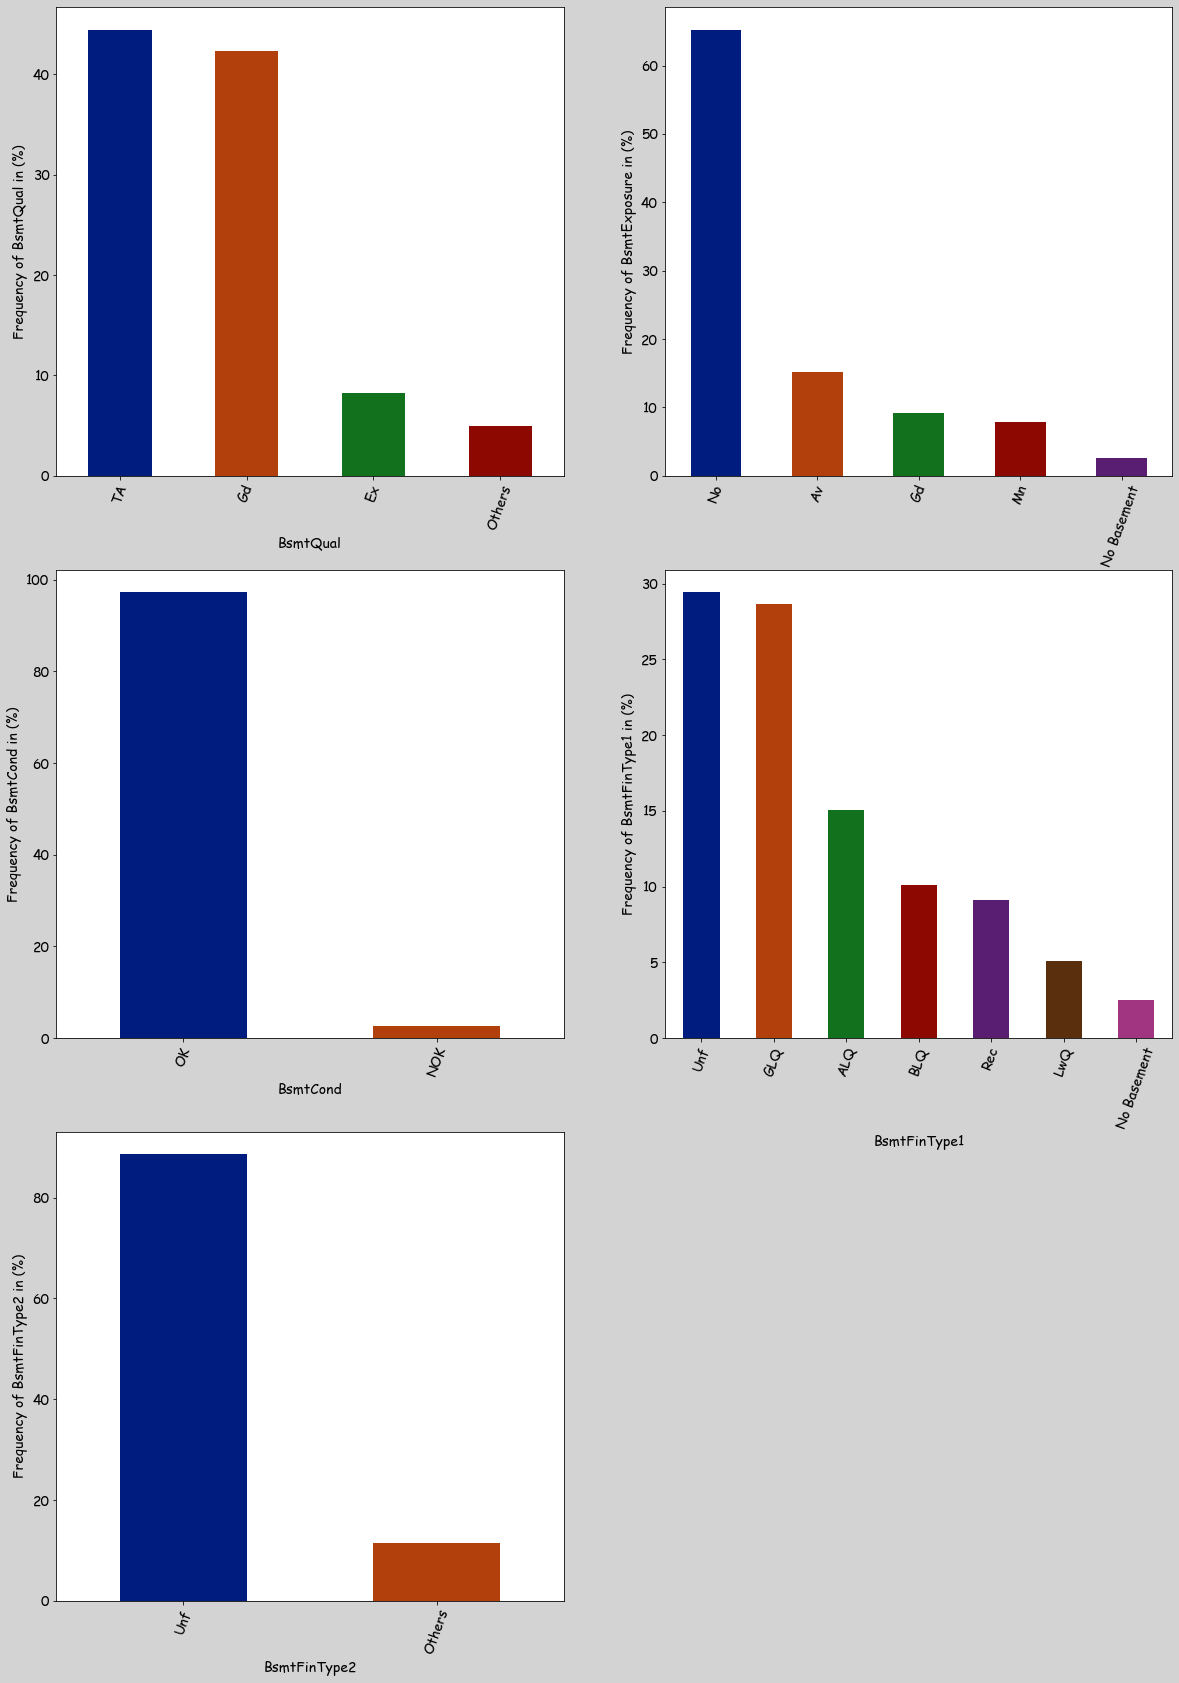

In [275]:
bar_plot_percentage(housing_data,cat_bsmt_colnames)

## Inferences 

- BsmtCond - is explaining the lowest valrience hence dropping the column

In [276]:
# Dropping BsmtCond.
housing_data.drop(['BsmtCond'], 1, inplace = True)

In [277]:
cat_bsmt_colnames = ['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2']

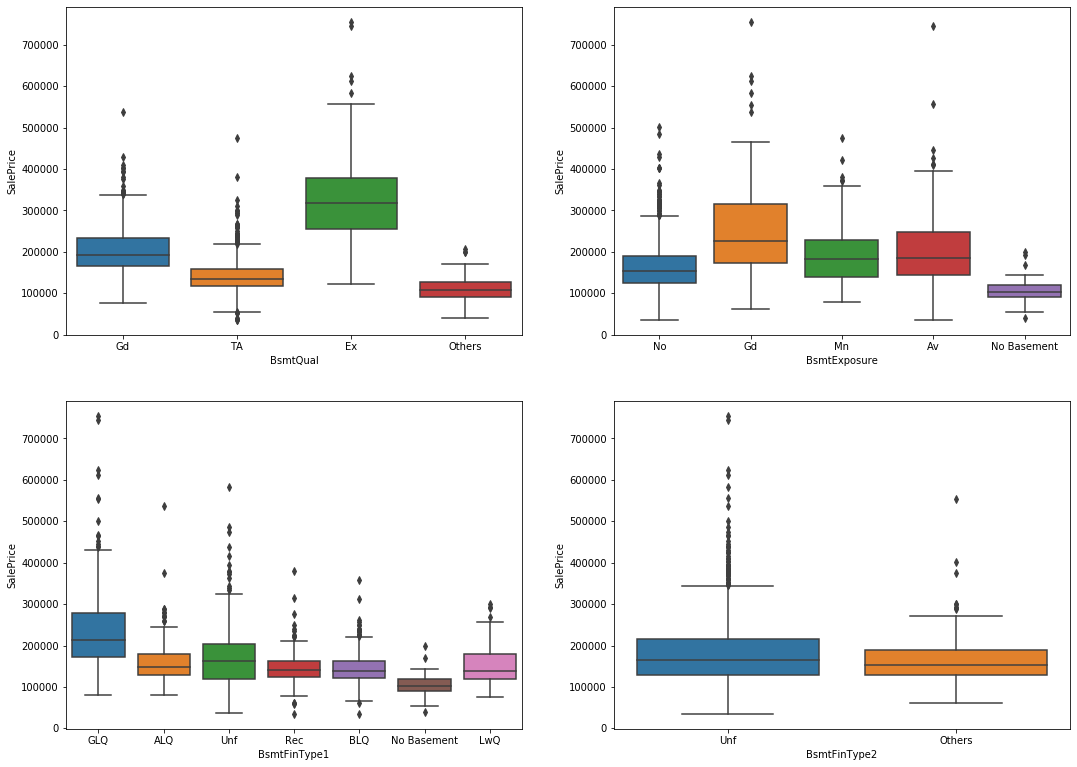

In [278]:
box_plot(cat_bsmt_colnames[:])

## Inference
- BsmtFinType2 - More than 90% values are Unf, hence there is no variance. Also Doen't have strong influence on Sale.
- BsmtFinType1 - Doesn't have strong influence on Sale. Hence can be removed.

In [279]:
# Dropping BSMtFinType1 & BSMtFinType2.
housing_data.drop(['BsmtFinType1','BsmtFinType2'], 1, inplace = True)

In [280]:
housing_data.shape

(1460, 74)

## Handling Missing values related to Garage

In [281]:
garage_colnames = ['GarageType','GarageCond','GarageYrBlt','GarageFinish','GarageQual','GarageCars','GarageArea']
cat_garage_colnames = ['GarageType','GarageCond','GarageFinish','GarageQual']
num_garage_colnames = ['GarageCars','GarageArea','SalePrice']

In [282]:
#Identifying Missing data
total_null = housing_data[garage_colnames].isnull().sum().sort_values(ascending = False)
percent = ((housing_data[garage_colnames].isnull().sum()/housing_data[garage_colnames].isnull().count())*100).sort_values(ascending = False)
print("Total records (Garage Data) = ", housing_data[garage_colnames].shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(20)

Total records (Garage Data) =  1460


,Total Missing,In Percent
GarageQual,81,5.55
GarageFinish,81,5.55
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageArea,0,0.00
GarageCars,0,0.00


## Inference

- Based on the Data description, NA refers to No garage.

In [283]:
#Cleaning up variable GarageType,GarageCond,GarageYrBlt,GarageFinish & GarageQual (Replacing NA => No Garage).
housing_data['GarageType'].replace({np.nan:'No Garage'},inplace=True)
housing_data['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
housing_data['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
housing_data['GarageQual'].replace({np.nan:'No Garage'},inplace=True)

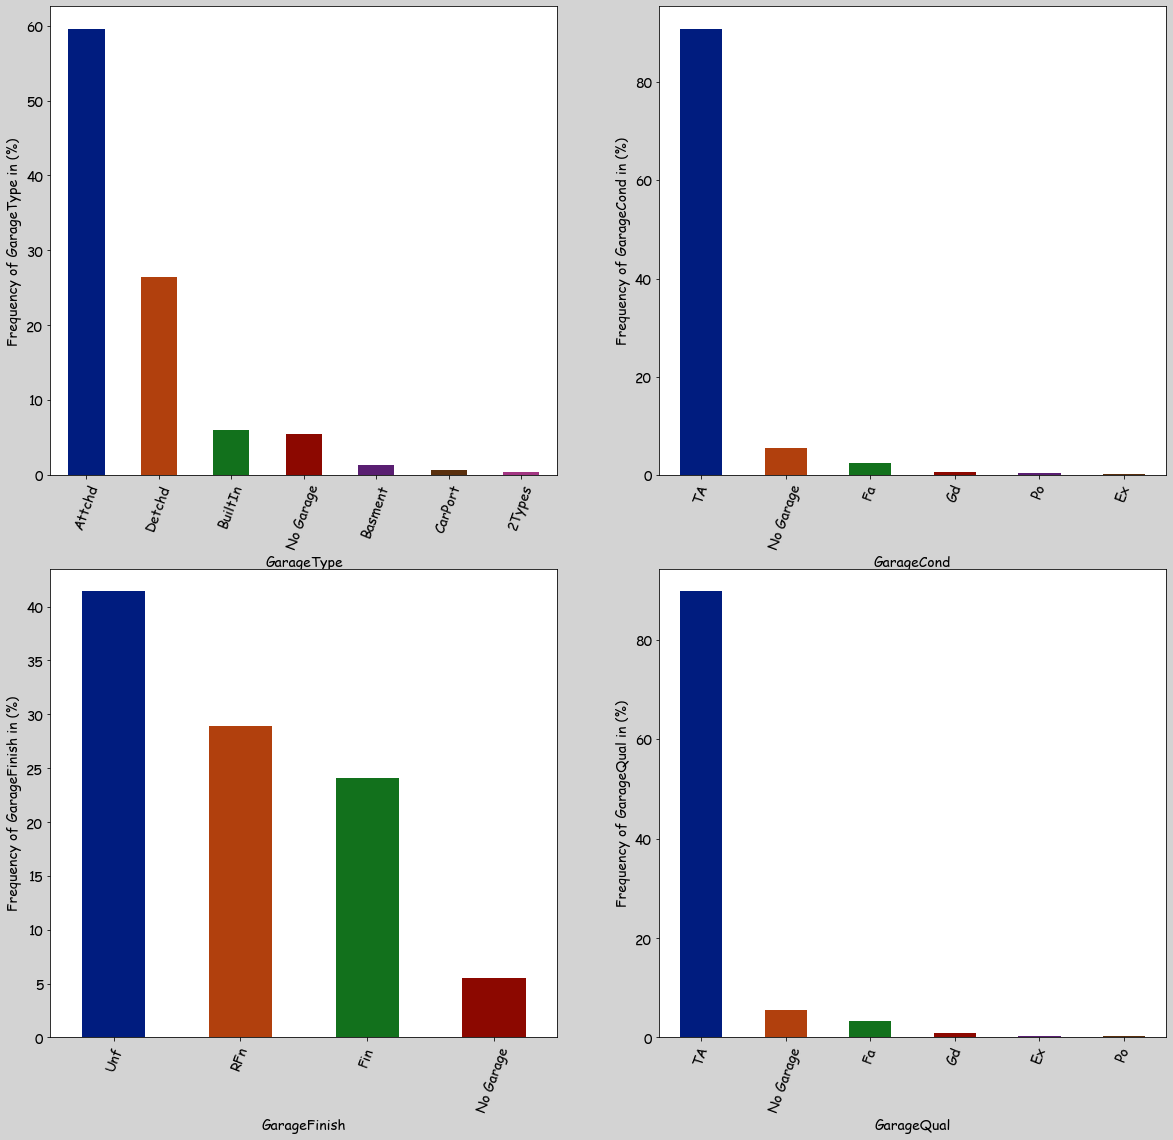

In [284]:
bar_plot_percentage(housing_data,cat_garage_colnames)

## Inferences

GarageQual
- Fa (Fair), TA (Typical) Ex (Excellent) & Gd (Good) can be combined as OK Garage.
- Po (Poor) and No Garage are similar. They can be combined as No Garage.

GarageCond
- Po (Poor) - No Garage
- Fa (Fair), TA (Typical) Ex (Excellent) & Gd (Good) can be combined as OK Garage.

GarageType
- CarPort, Basment & No Garage move to Others. 

In [285]:
# Fa (Fair), TA (Typical) Ex (Excellent) & Gd (Good) can be combined as OK Garage.
# Po (Poor) and No Garage are similar. They can be combined as No Garage.
housing_data['GarageQual'].replace({'TA':'OK Garage'},inplace=True)
housing_data['GarageQual'].replace({'Fa':'OK Garage'},inplace=True)
housing_data['GarageQual'].replace({'Gd':'OK Garage'},inplace=True)
housing_data['GarageQual'].replace({'Ex':'OK Garage'},inplace=True)
housing_data['GarageQual'].replace({'Po':'No Garage'},inplace=True)

In [286]:
#Imputing level values of GarageCond
housing_data['GarageCond'].replace({'TA':'OK'},inplace=True)
housing_data['GarageCond'].replace({'Fa':'OK'},inplace=True)
housing_data['GarageCond'].replace({'Gd':'OK'},inplace=True)
housing_data['GarageCond'].replace({'Ex':'OK'},inplace=True)
housing_data['GarageCond'].replace({'Po':'No Garage'},inplace=True)

In [287]:
#Garage type - CarPort, No Garage, Basement, 2Types can be combined as "Others"
#Imputing values to "Others"
housing_data['GarageType'].replace({'CarPort':'Others'},inplace=True)
housing_data['GarageType'].replace({'Basment':'Others'},inplace=True)
housing_data['GarageType'].replace({'No Garage':'Others'},inplace=True)
housing_data['GarageType'].replace({'2Types':'Others'},inplace=True)

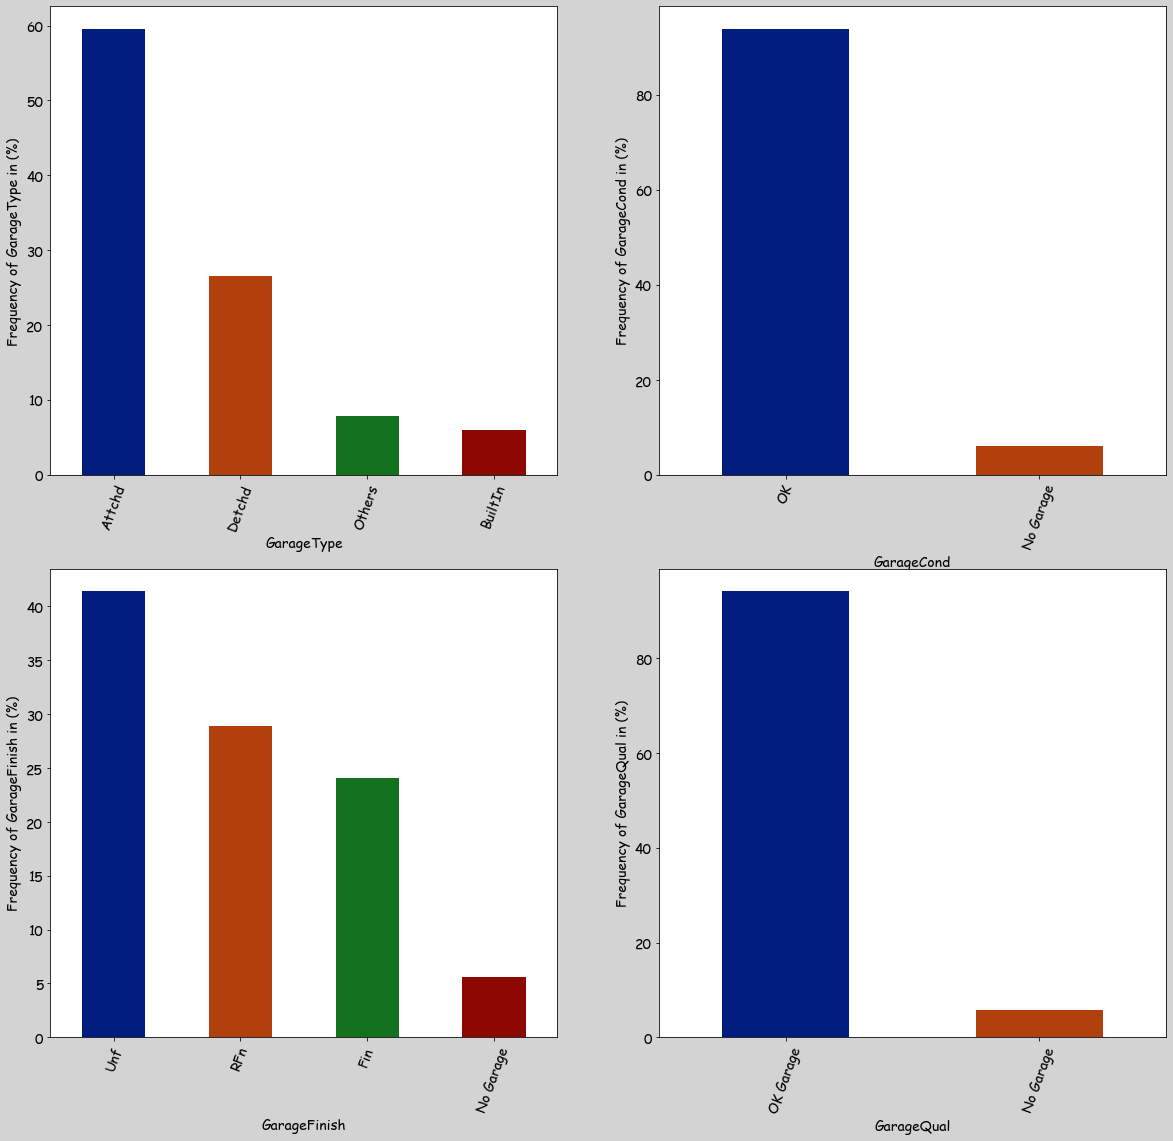

In [288]:
bar_plot_percentage(housing_data,cat_garage_colnames)

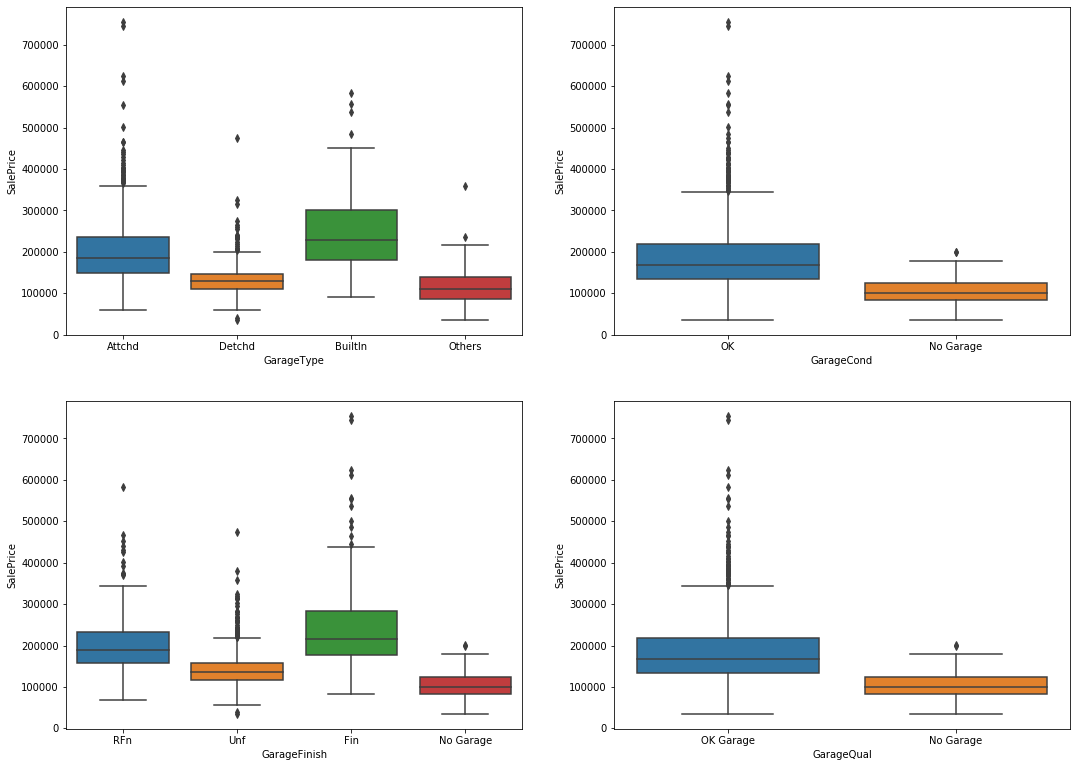

In [289]:
box_plot(cat_garage_colnames[:])

## Ingerence

- GarageCond and GarageQual seem to be same in influence on SalePrice, one can be dropped

In [290]:
#GarageCond and GarageQual seem to be same in influence on SalePrice, one can be dropped
housing_data=housing_data.drop(['GarageQual'],axis=1)

In [291]:
housing_data.shape

(1460, 73)

In [292]:
#Identifying Missing data
total_null = housing_data.isnull().sum().sort_values(ascending = False)
percent = ((housing_data.isnull().sum()/housing_data.isnull().count())*100).sort_values(ascending = False)
print("Total records (Housing Data) = ", housing_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records (Housing Data) =  1460


,Total Missing,In Percent
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
MasVnrType,8,0.55
Electrical,1,0.07
YearRemodAdd,0,0.00
RoofStyle,0,0.00
RoofMatl,0,0.00
Exterior1st,0,0.00


In [293]:
colnames = ['LotFrontage','FireplaceQu','MasVnrType','MasVnrArea','Electrical']
housing_data[colnames].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 5 columns):
LotFrontage    1201 non-null float64
FireplaceQu    770 non-null object
MasVnrType     1452 non-null object
MasVnrArea     1452 non-null float64
Electrical     1459 non-null object
dtypes: float64(2), object(3)
memory usage: 108.4+ KB


### LotFrontage 

- Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [294]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
housing_data["LotFrontage"] = housing_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [295]:
#Cleaning up variable FireplaceQu (Replacing NA => No Fireplace)
housing_data['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)

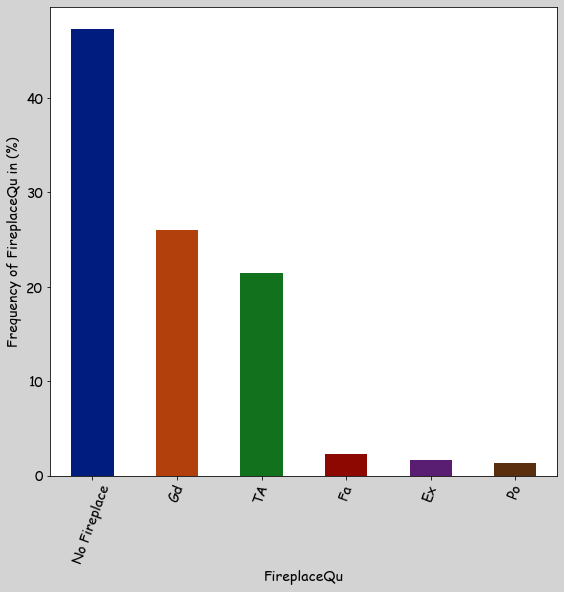

In [296]:
bar_plot_percentage(housing_data,['FireplaceQu'])

## Inferences

- Categorizing the Fireplace into 2 level - OK Fireplace and No Fireplace
- Poor rating fireplace considered as No Fireplace.

In [297]:
#Imputing level values of FireplaceQu
housing_data['FireplaceQu'].replace({'Fa':'OK Fireplace'},inplace=True)
housing_data['FireplaceQu'].replace({'TA':'OK Fireplace'},inplace=True)
housing_data['FireplaceQu'].replace({'Gd':'OK Fireplace'},inplace=True)
housing_data['FireplaceQu'].replace({'Ex':'OK Fireplace'},inplace=True)
housing_data['FireplaceQu'].replace({'Po':'No Fireplace'},inplace=True)

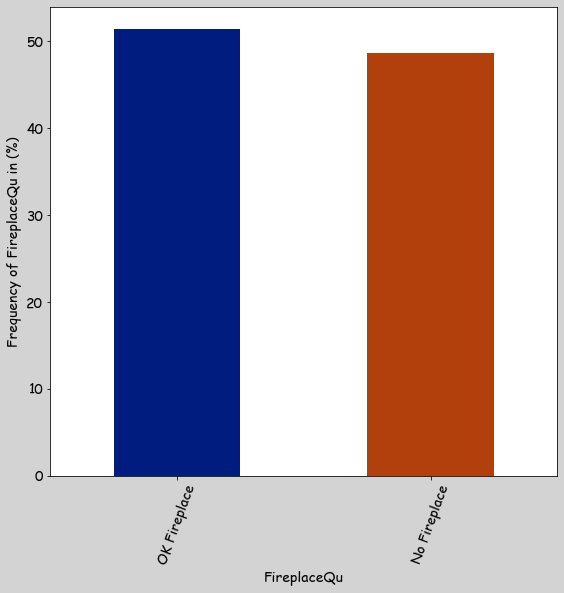

In [298]:
bar_plot_percentage(housing_data,['FireplaceQu'])

### MasVnrArea and MasVnrType 

- NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [299]:
housing_data["MasVnrType"] = housing_data["MasVnrType"].fillna("None")
housing_data["MasVnrArea"] = housing_data["MasVnrArea"].fillna(0)

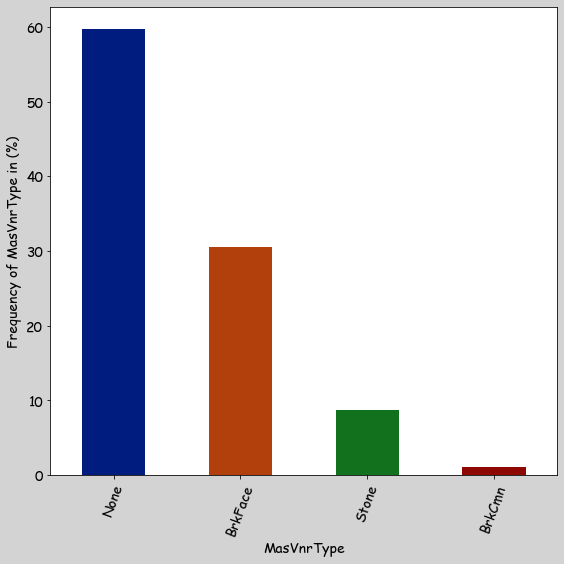

In [300]:
bar_plot_percentage(housing_data,['MasVnrType'])

In [301]:
#Replacing missing value with Unknown
housing_data['Electrical'].replace({np.nan:'Unknown'},inplace=True)

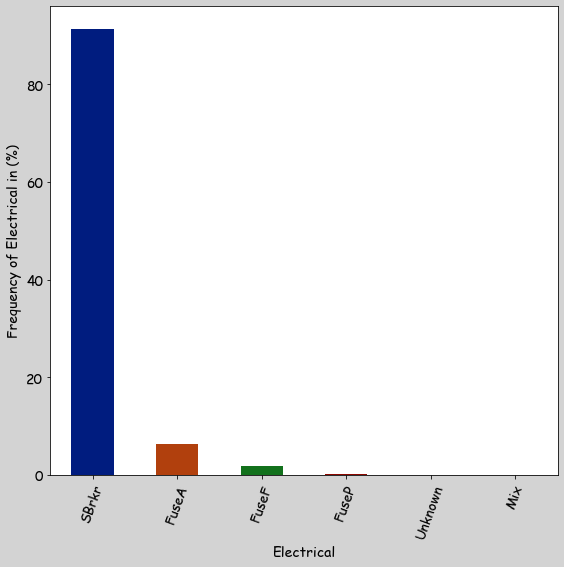

In [302]:
bar_plot_percentage(housing_data,['Electrical'])

## Inference

- More than 80% of Electicals are "Standard Circuit Breakers & Romex".
- Combined others into one category call 'Others'

In [303]:
#Imputing the minor category levels of Electrical
housing_data['Electrical'].replace({'FuseA':'Others'},inplace=True)
housing_data['Electrical'].replace({'FuseF':'Others'},inplace=True)
housing_data['Electrical'].replace({'FuseP':'Others'},inplace=True)
housing_data['Electrical'].replace({'Mix':'Others'},inplace=True)
housing_data['Electrical'].replace({'Unknown':'Others'},inplace=True)

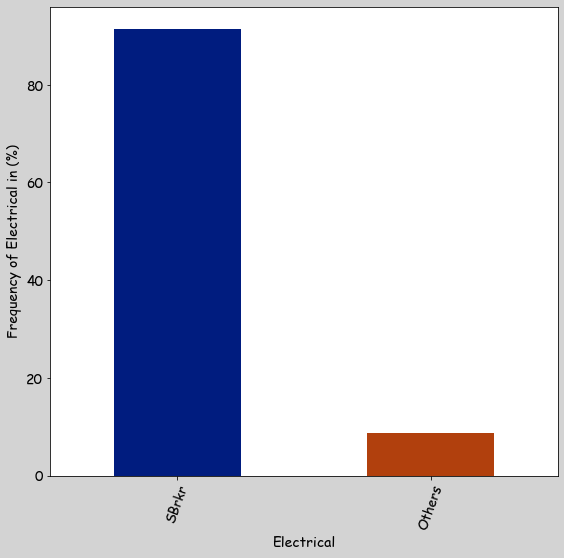

In [304]:
bar_plot_percentage(housing_data,['Electrical'])

In [305]:
#Identifying Missing data
total_null = housing_data.isnull().sum().sort_values(ascending = False)
percent = ((housing_data.isnull().sum()/housing_data.isnull().count())*100).sort_values(ascending = False)
print("Total records (Housing Data) = ", housing_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(5)

Total records (Housing Data) =  1460


,Total Missing,In Percent
GarageYrBlt,81,5.55
SalePrice,0,0.00
MasVnrArea,0,0.00
YearRemodAdd,0,0.00
RoofStyle,0,0.00


## Inferences

- GarageYrBlt will handle with Year Built.
- No other missing values.

In [306]:
housing_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       115
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
                 ... 
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         2
GarageType          4
GarageYrBlt        97
GarageFinish        4
GarageCars

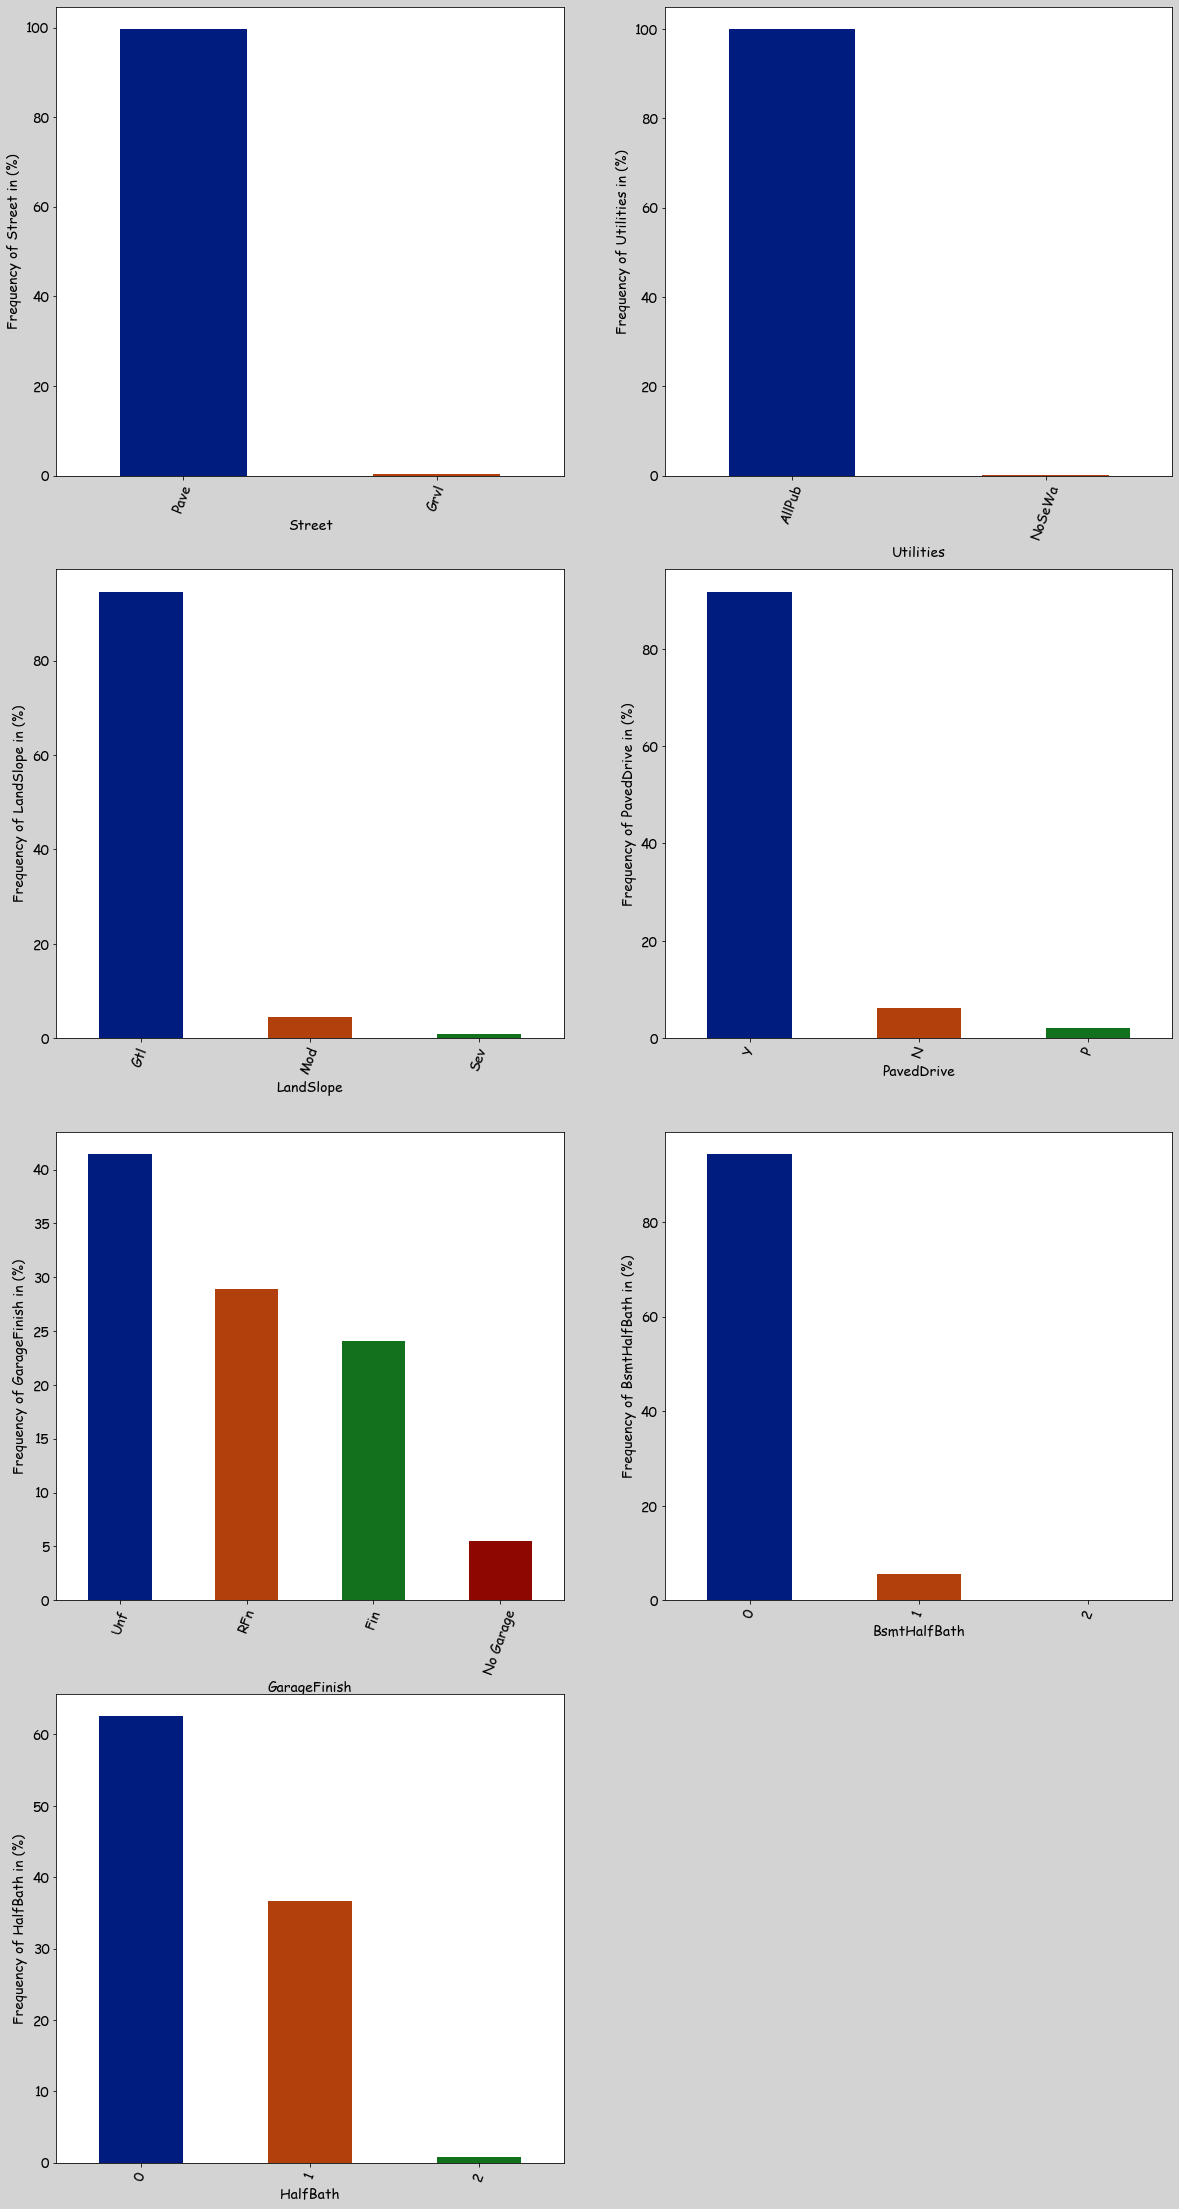

In [307]:
colnames = ['Street','Utilities','LandSlope','PavedDrive','GarageFinish','BsmtHalfBath','HalfBath']
bar_plot_percentage(housing_data,colnames)

# Inferences

 - Clearly **Id** is one variable that are just indicative of the Unique ID.
 - Those features which have only **one unique** value are :
    - **Street**
    - **Utililies**
    

These features show no variance and thus all the leads have chosen one option, thus this feature doesnt make any impact or difference on conversion of leads

In [308]:
# Dropping Id, Street & Utilities.
housing_data.drop(['Id','Street','Utilities'], 1, inplace = True)

In [309]:
housing_data.shape

(1460, 70)

## Datatype Validation
- Identifying wrong data type

In [310]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 70 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 n

In [311]:
## Zoning class are given in numerical; therefore converted to categorical variables. 
housing_data['MSSubClass'] = housing_data['MSSubClass'].astype(str)

# Understanding the Data or Data Visualization

- Extracting data (if required) - Spliting the Column like in current data we have YearBuilt, YearRemode
- Identifying the skewness for dependent variables. (in our case it is price)

## Calculating Age of House and Remodel Age

In [312]:
year_colnames = ['YearBuilt','YearRemodAdd','GarageYrBlt']
housing_data[year_colnames].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt
count,1460.00,1460.00,1379.00
mean,1971.27,1984.87,1978.51
std,30.20,20.65,24.69
min,1872.00,1950.00,1900.00
25%,1954.00,1967.00,1961.00
50%,1973.00,1994.00,1980.00
75%,2000.00,2004.00,2002.00
max,2010.00,2010.00,2010.00


In [313]:
#Converting year to number of years
housing_data['BuiltAge'] = 2010 - housing_data['YearBuilt']
housing_data['RemodelAge'] = 2010 - housing_data['YearRemodAdd']
housing_data['GaragebuiltAge'] = 2010 - housing_data['GarageYrBlt']

In [314]:
#Binning of the Year built variable

#Creating bins to define the year periods - 0,10,20,35,60,85,140
bins=[0,10,20,35,60,85,140]
slot_names=['0-10','11-20','21-35','36-60','61-85','86-140']

housing_data['Age of Building']=pd.cut(housing_data['BuiltAge'],bins,labels=slot_names,include_lowest=True)
100*(housing_data['Age of Building'].value_counts()/housing_data['Age of Building'].count())

36-60    29.59
0-10     26.58
61-85    11.78
11-20    11.16
21-35    10.89
86-140   10.00
Name: Age of Building, dtype: float64

In [315]:
#Binning of the Year Garage Built variable

#Creating bins to define the year periods - 0,10,20,35,60,85,140
bins=[0,10,20,35,60,85,140]
slot_names=['0-10','11-20','21-35','36-60','61-85','86-140']

housing_data['Age of Garage Built']=pd.cut(housing_data['GaragebuiltAge'],bins,labels=slot_names,include_lowest=True)
100*(housing_data['Age of Garage Built'].value_counts()/housing_data['Age of Garage Built'].count())

36-60    30.09
0-10     29.15
21-35    14.65
11-20    14.21
61-85     8.63
86-140    3.26
Name: Age of Garage Built, dtype: float64

In [316]:
#Binning of the Year Remodel variable

#Creating bins to define the year periods -[0,10,20,35,55,140]
bins=[0,10,20,35,55,140]
slot_names=['0-10','11-20','21-35','36-55','56-140']

housing_data['Age of Remodel']=pd.cut(housing_data['RemodelAge'],bins,labels=slot_names,include_lowest=True)
100*(housing_data['Age of Remodel'].value_counts()/housing_data['Age of Remodel'].count())

0-10     37.81
36-55    19.04
11-20    16.78
56-140   14.45
21-35    11.92
Name: Age of Remodel, dtype: float64

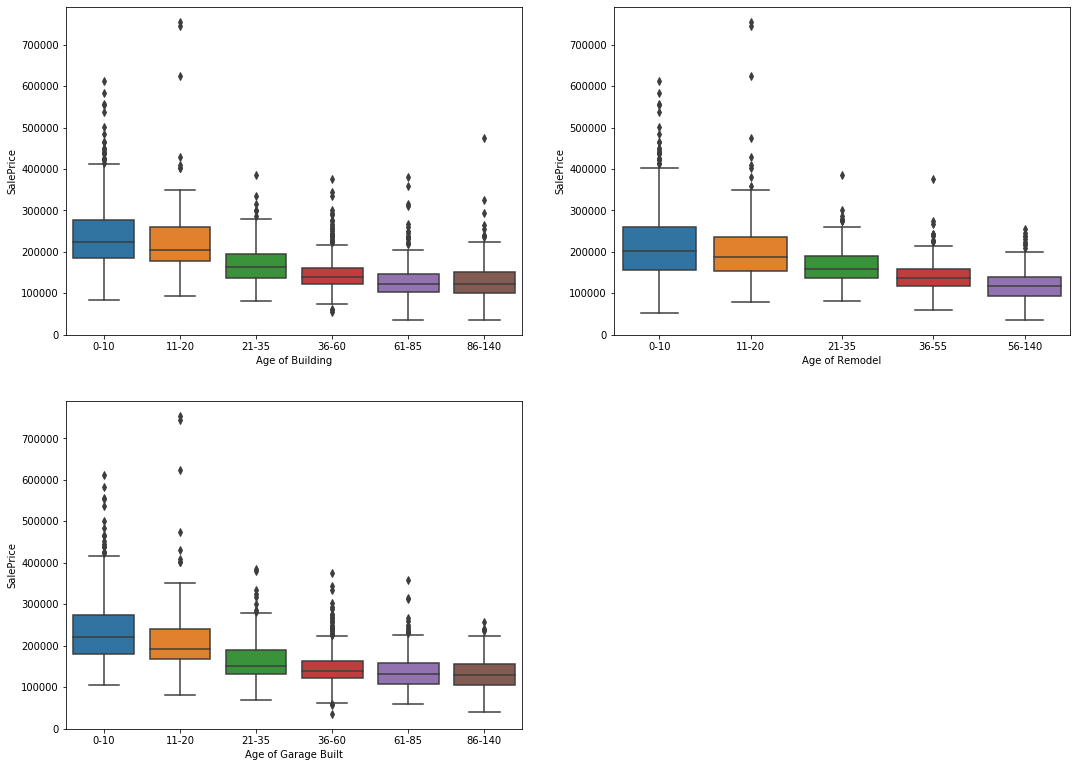

In [317]:
box_plot(['Age of Building','Age of Remodel','Age of Garage Built'])

## Inference

- Sale Price is increasing with the Age of building and Age of Remodeling.
- Sale Price increase is similar as Age og Building and Age of Garage built hence removing Age of Garage built.
- The differe in Garage built data with Age of Building is because some houses doesnot have the Garage.

In [318]:
# 'MoSold','YrSold','YearRemodAdd' , YearBuilt & GarageYrBlt are of no more use
housing_data=housing_data.drop(['MoSold','YrSold','YearRemodAdd','YearBuilt','GarageYrBlt'],axis=1)

In [319]:
housing_data=housing_data.drop(['BuiltAge','RemodelAge','GaragebuiltAge','Age of Garage Built'],axis=1)

In [320]:
## Age of Building are set as numerical but it is categorical variable; therefore converted to categorical variables. 
housing_data['Age of Building'] = housing_data['Age of Building'].astype(str)
## Age of Remodel are set as numerical but it is categorical variable; therefore converted to categorical variables. 
housing_data['Age of Remodel'] = housing_data['Age of Remodel'].astype(str)

In [321]:
housing_data.shape

(1460, 67)

## Identifying the skewness for dependent variables. (in our case it is SalePrice)

Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression

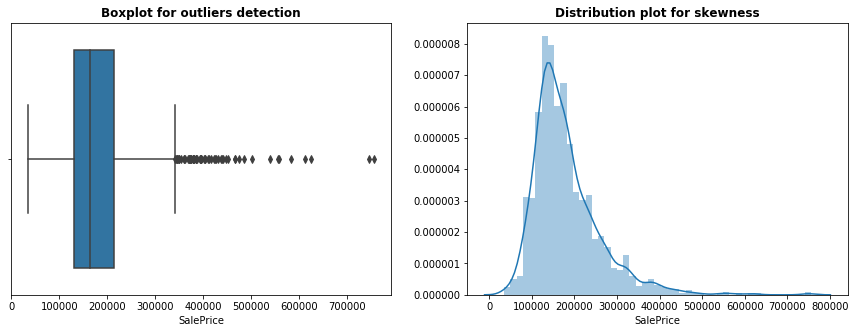

In [322]:
# Visualizing our dependent variable for Outliers and Skewness
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(housing_data["SalePrice"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1,2,2)
sns.distplot(housing_data["SalePrice"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

## Inferences

- Our target variable, SalePrice is not normally distributed.
- SalePrice is right-skewed.
- There are multiple outliers in the variable. 

## Check out relationships among the target variable and other predictor variables.

In [323]:
## Getting the correlation of all the features with target variable. 
(housing_data.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual     0.63
GrLivArea       0.50
GarageCars      0.41
GarageArea      0.39
TotalBsmtSF     0.38
1stFlrSF        0.37
FullBath        0.31
TotRmsAbvGrd    0.28
MasVnrArea      0.22
Fireplaces      0.22
BsmtFinSF1      0.15
LotFrontage     0.12
WoodDeckSF      0.11
2ndFlrSF        0.10
OpenPorchSF     0.10
HalfBath        0.08
LotArea         0.07
BsmtFullBath    0.05
BsmtUnfSF       0.05
BedroomAbvGr    0.03
KitchenAbvGr    0.02
EnclosedPorch   0.02
ScreenPorch     0.01
PoolArea        0.01
OverallCond     0.01
3SsnPorch       0.00
LowQualFinSF    0.00
MiscVal         0.00
BsmtHalfBath    0.00
BsmtFinSF2      0.00
Name: SalePrice, dtype: float64

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]), <a list of 11 Text xticklabel objects>)

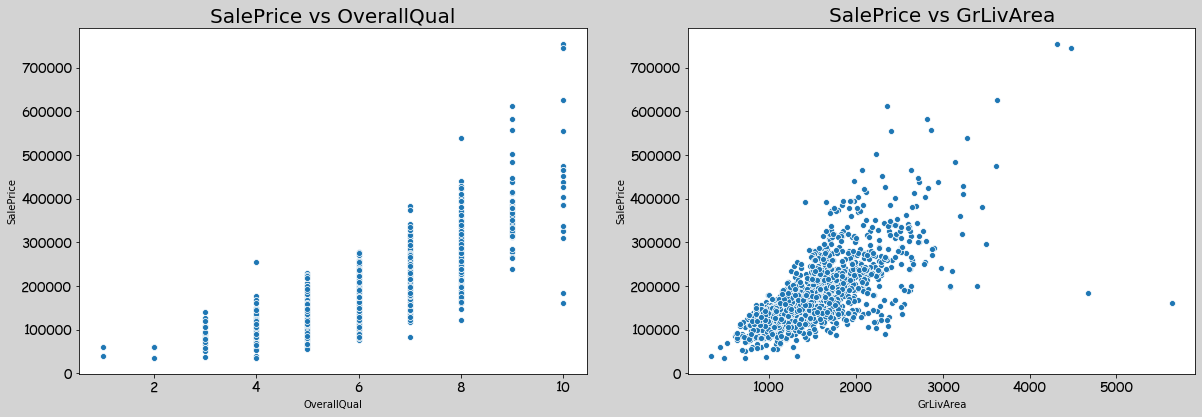

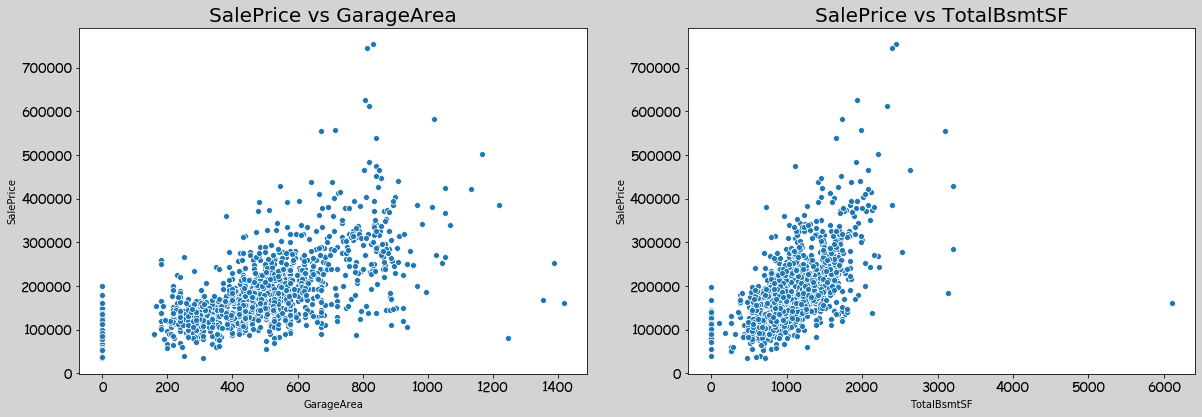

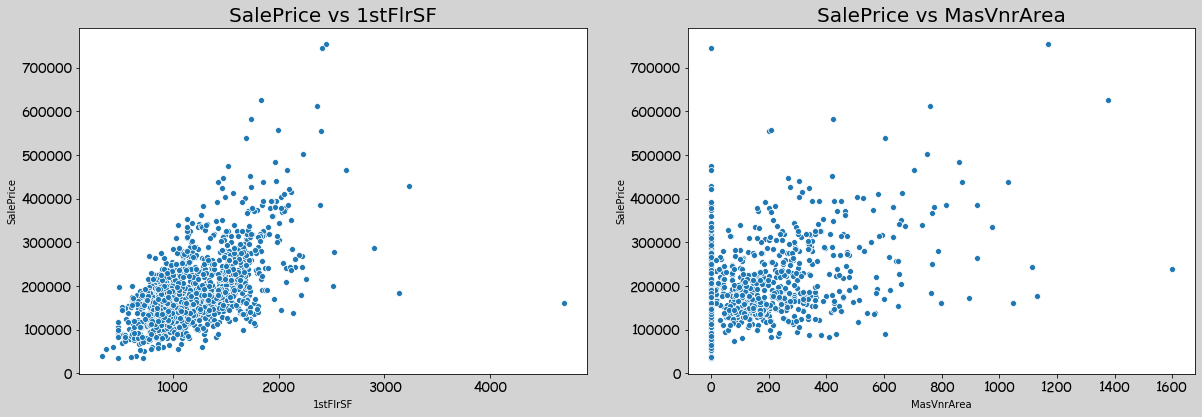

In [324]:
fig = plt.figure(figsize=(20, 14))
fig.set_facecolor("lightgrey")

plt.subplot(2,2,1)
sns.scatterplot(data=housing_data, x='OverallQual', y='SalePrice')
plt.title("SalePrice vs OverallQual",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

plt.subplot(2,2,2)
sns.scatterplot(data=housing_data, x='GrLivArea', y='SalePrice')
plt.title("SalePrice vs GrLivArea",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

fig = plt.figure(figsize=(20, 14))
fig.set_facecolor("lightgrey")

plt.subplot(2,2,1)
sns.scatterplot(data=housing_data, x='GarageArea', y='SalePrice')
plt.title("SalePrice vs GarageArea",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

plt.subplot(2,2,2)
sns.scatterplot(data=housing_data, x='TotalBsmtSF', y='SalePrice')
plt.title("SalePrice vs TotalBsmtSF",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

fig = plt.figure(figsize=(20, 14))
fig.set_facecolor("lightgrey")

plt.subplot(2,2,1)
sns.scatterplot(data=housing_data, x='1stFlrSF', y='SalePrice')
plt.title("SalePrice vs 1stFlrSF",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

plt.subplot(2,2,2)
sns.scatterplot(data=housing_data, x='MasVnrArea', y='SalePrice')
plt.title("SalePrice vs MasVnrArea",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

## Inferences -
- OverallQual is a categorical variable and scatter plot is not the best way to visualize categorical variables. However, it looks like some of the houses are overpriced compared to their overall quality

In [325]:
## the "OverallCond" and "OverallQual" of the house. 
housing_data['OverallCond'] = housing_data['OverallCond'].astype(str) 
housing_data['OverallQual'] = housing_data['OverallQual'].astype(str)

In [326]:
## trainsforming target variable using numpy.log1p, 
housing_data["SalePrice"] = np.log1p(housing_data["SalePrice"])

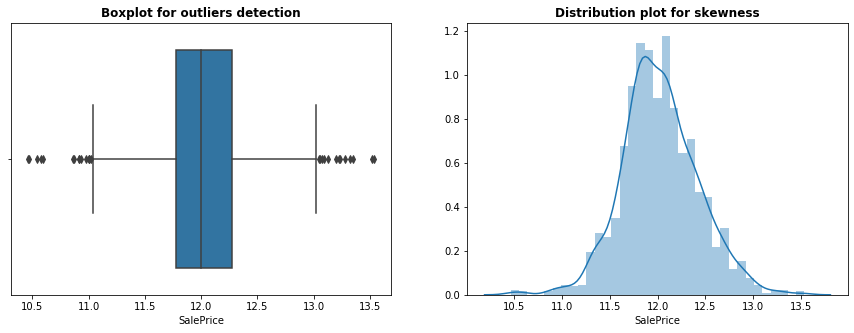

In [327]:
# Visualizing our dependent variable for Outliers and Skewness
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(housing_data["SalePrice"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1,2,2)
sns.distplot(housing_data["SalePrice"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]), <a list of 9 Text xticklabel objects>)

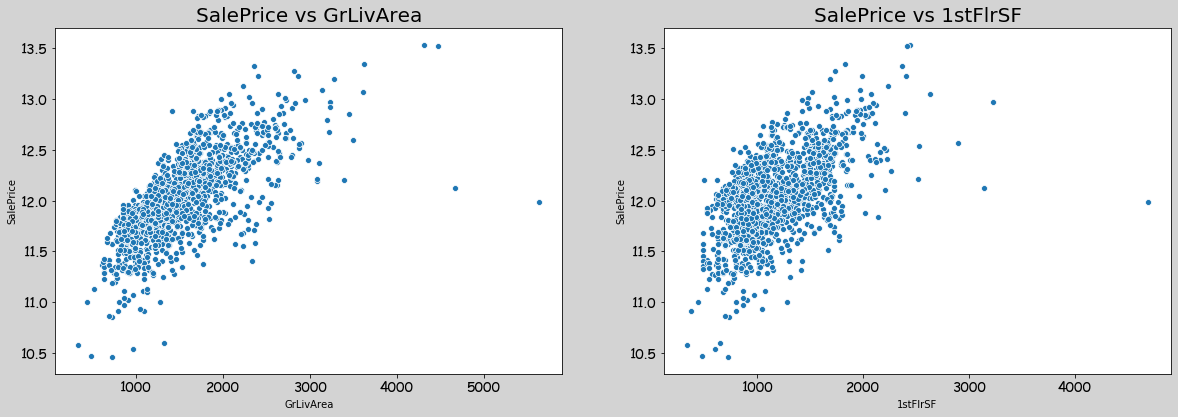

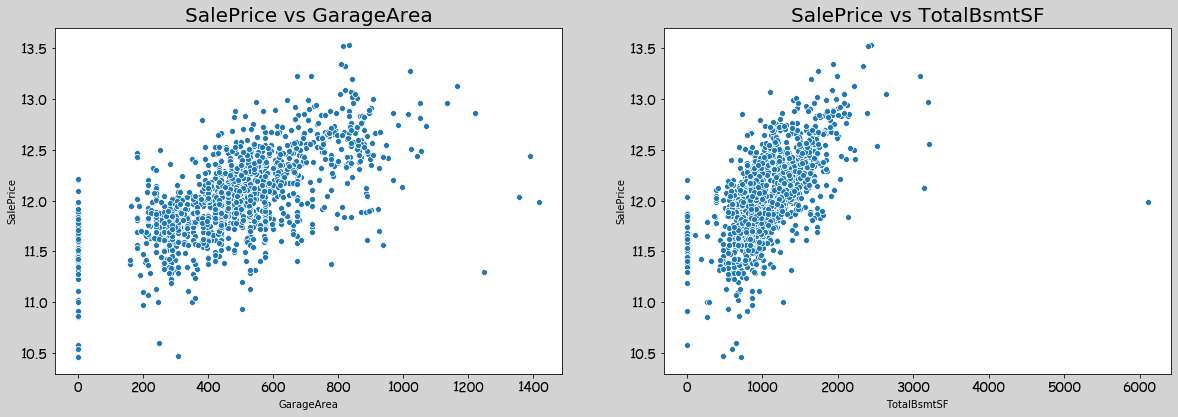

In [328]:
fig = plt.figure(figsize=(20, 14))
fig.set_facecolor("lightgrey")

plt.subplot(2,2,1)
sns.scatterplot(data=housing_data, x='GrLivArea', y='SalePrice')
plt.title("SalePrice vs GrLivArea",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

plt.subplot(2,2,2)
sns.scatterplot(data=housing_data, x='1stFlrSF', y='SalePrice')
plt.title("SalePrice vs 1stFlrSF",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

fig = plt.figure(figsize=(20, 14))
fig.set_facecolor("lightgrey")

plt.subplot(2,2,1)
sns.scatterplot(data=housing_data, x='GarageArea', y='SalePrice')
plt.title("SalePrice vs GarageArea",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")

plt.subplot(2,2,2)
sns.scatterplot(data=housing_data, x='TotalBsmtSF', y='SalePrice')
plt.title("SalePrice vs TotalBsmtSF",fontsize=20)
plt.yticks(fontsize=14,family = "Comic Sans MS")
plt.xticks(fontsize=14,family = "Comic Sans MS")



# EDA

## Deepdive on Basement related variables

In [329]:
cat_bsmt_colnames = ['BsmtQual','BsmtExposure']
bsmt_colnames = ['BsmtQual','BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']

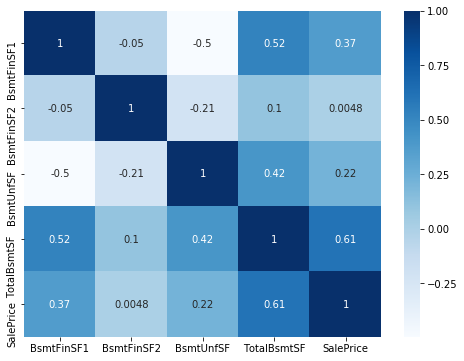

In [330]:
plt.figure(figsize = (8,6))        
ax = sns.heatmap(housing_data[bsmt_colnames].corr(),annot = True,cmap="Blues")

## Inference 

- Only TotalBsmtSF has a significant Corelation with SalePrice. Hence removing others.

<Figure size 1440x720 with 0 Axes>

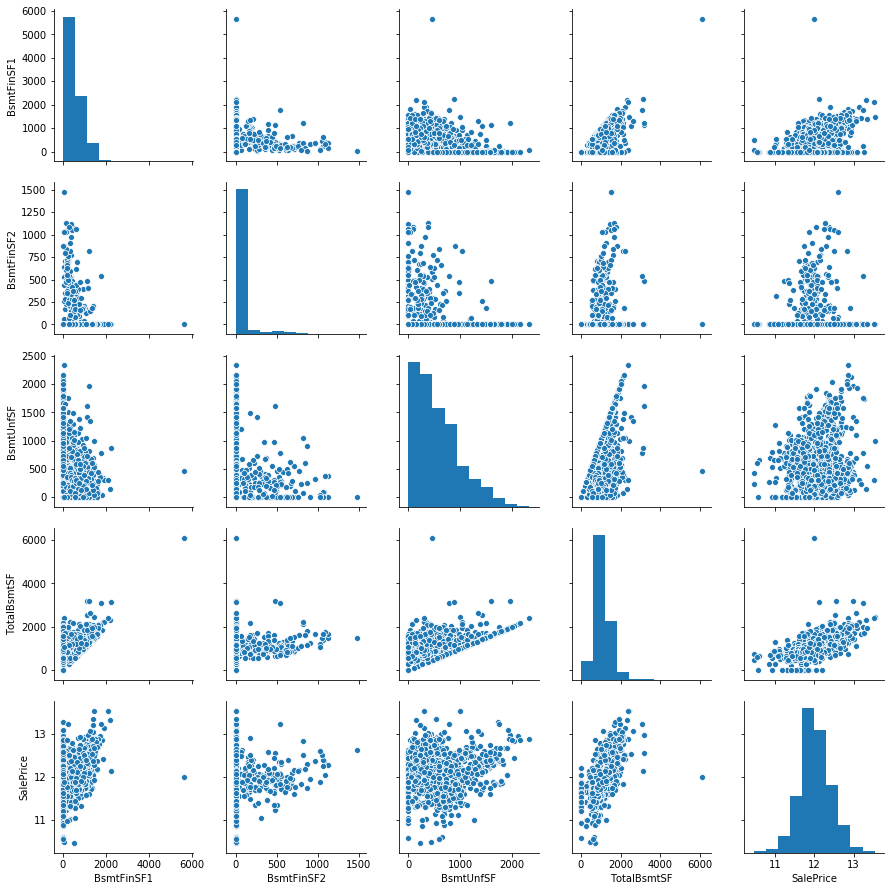

In [331]:
# pairwise scatter plot to explore Basement attributes
plt.figure(figsize=(20, 10))
sns.pairplot(housing_data[num_bsmt_colnames])
plt.show()

In [332]:
# Dropping BSMtFinType2.
housing_data.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], 1, inplace = True)

## Deepdive on Garage related variables

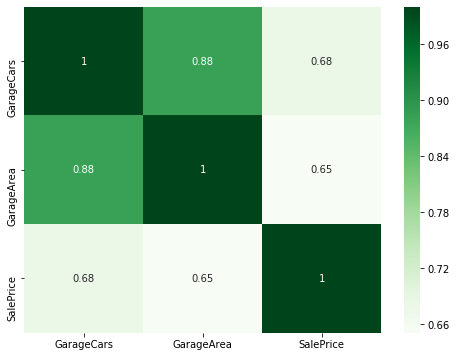

In [333]:
plt.figure(figsize = (8,6))        
ax = sns.heatmap(housing_data[num_garage_colnames].corr(),annot = True,cmap="Greens")

## Inference

- GargeCards and GarageArea has significant influnce to SalePrice for House.
- 88% correlation between Garage Area and Garage Cars

## Take Deep dive on Porch related Numerical Variables

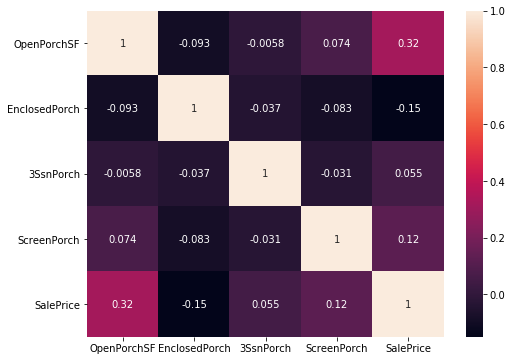

In [334]:
#Taking a deep dive into the Porch related attributes to understand the correlations
porch_colname = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']
plt.figure(figsize = (8,6))        
ax = sns.heatmap(housing_data[porch_colname].corr(),annot = True)

## Inferences

- Other than OpenPorchSF, everything has very less signifance compare to SalePrice. Hence removing others.

<Figure size 1440x720 with 0 Axes>

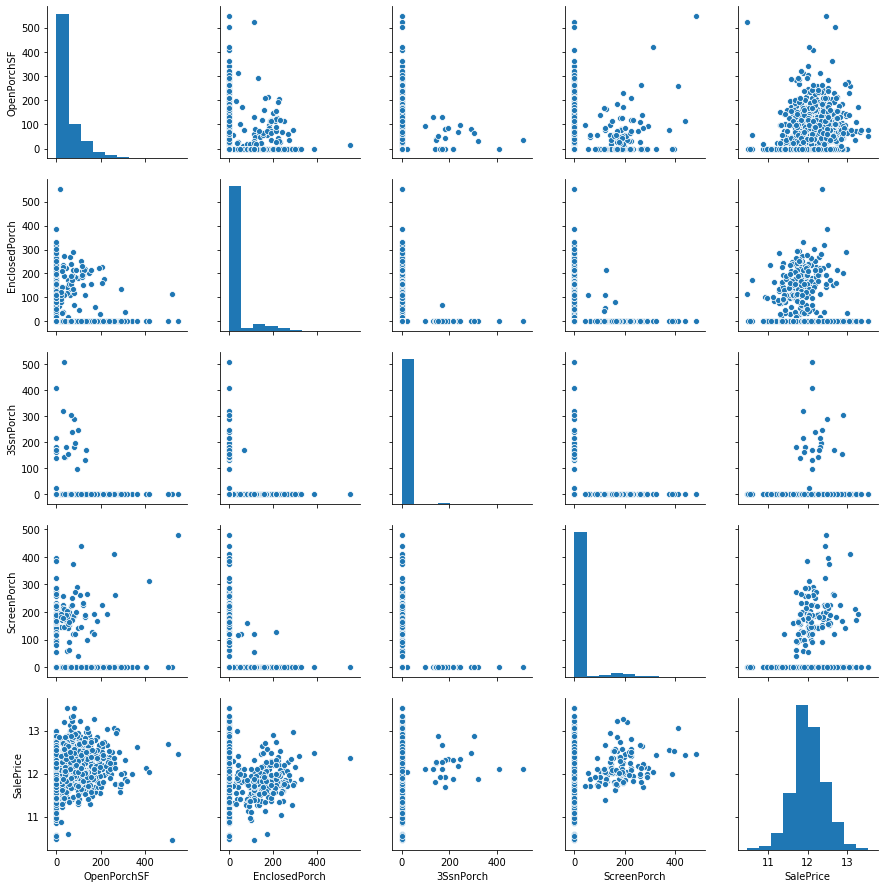

In [335]:
# pairwise scatter plot to explore Porch attributes
plt.figure(figsize=(20, 10))
sns.pairplot(housing_data[porch_colname])
plt.show()

In [336]:
# 'EnclosedPorch','3SsnPorch','ScreenPorch' are having less influence on SalePrice and can be dropped
housing_data=housing_data.drop(['EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)

In [337]:
housing_data.shape

(1460, 61)

## Derived Variables

In [338]:
# Adding total sqfootage feature 
housing_data['TotalSF'] = housing_data['TotalBsmtSF'] + housing_data['1stFlrSF'] + housing_data['2ndFlrSF']

## Deep dive on "Neighborhood variable as it has 25 different category values"

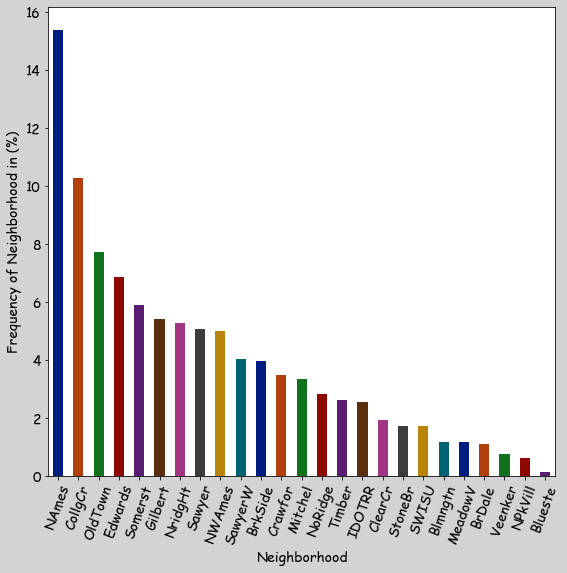

In [339]:
bar_plot_percentage(housing_data,['Neighborhood'])

## Inferences 
- Merging all the Neighborhood case which are less than 2% to other Category.

In [340]:
#Imputing values of the minor category levels in Neighborhood
housing_data['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'Blueste':'Others'},inplace=True)

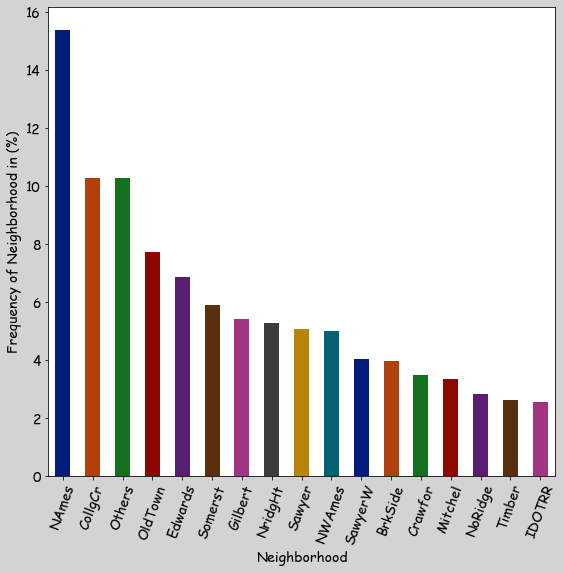

In [341]:
bar_plot_percentage(housing_data,['Neighborhood'])

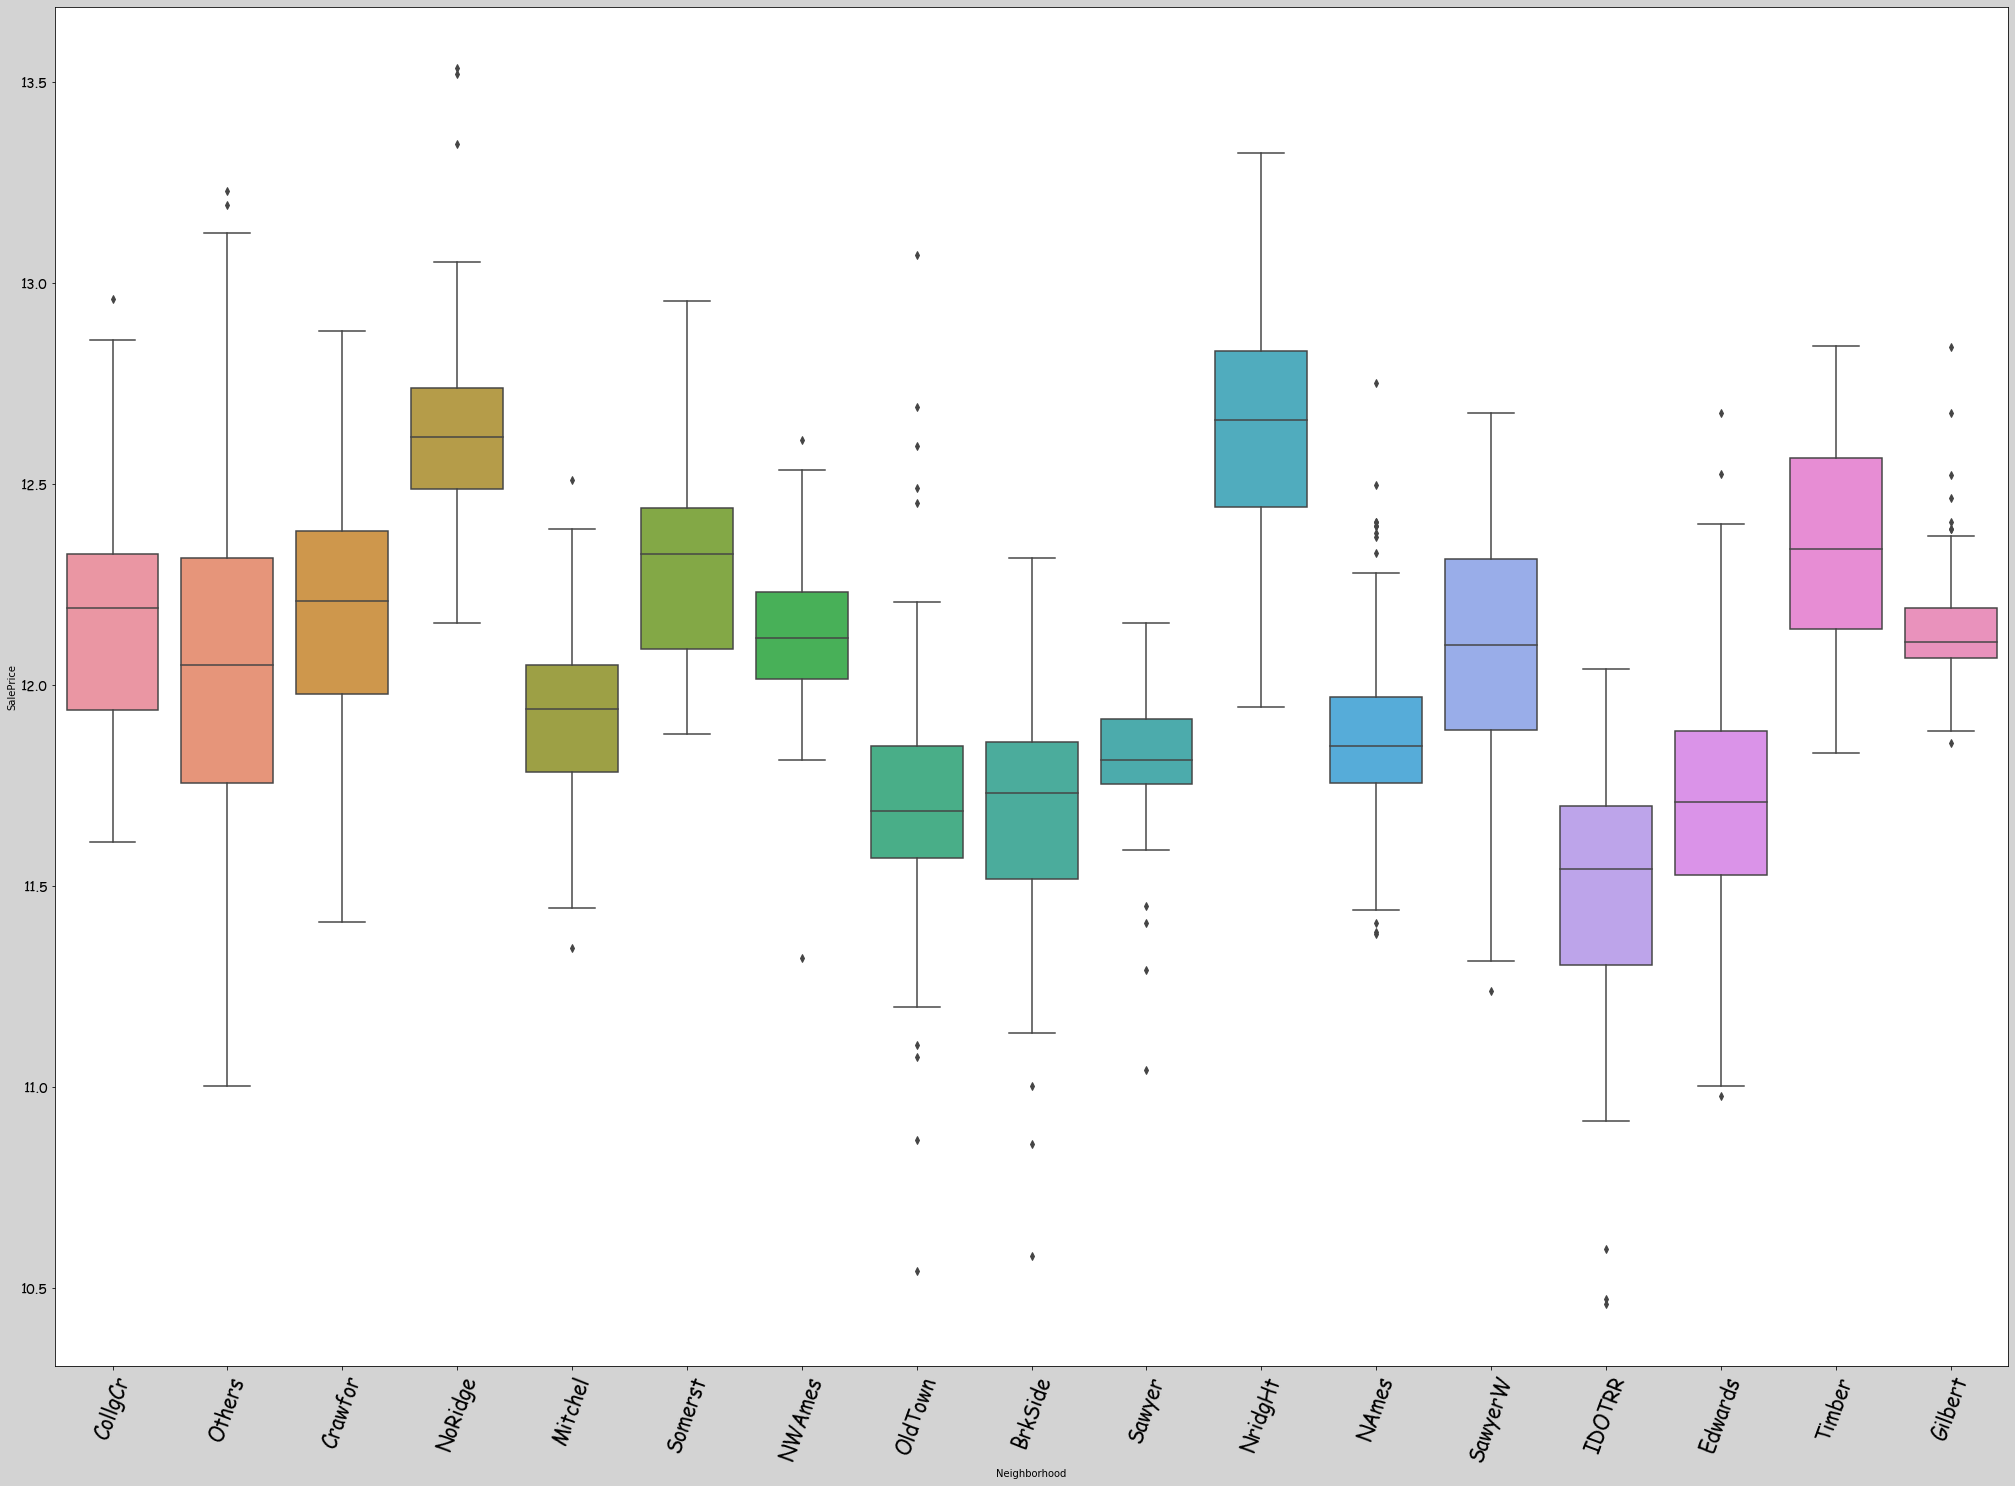

In [391]:
#Function to plot a list of categorical variables together
fig = plt.figure(figsize=(35, 25))
fig.set_facecolor("lightgrey")

sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing_data)
plt.xticks(rotation = 70,fontsize=20,family="Comic Sans MS")
plt.yticks(fontsize=14,family="Comic Sans MS")
plt.show()

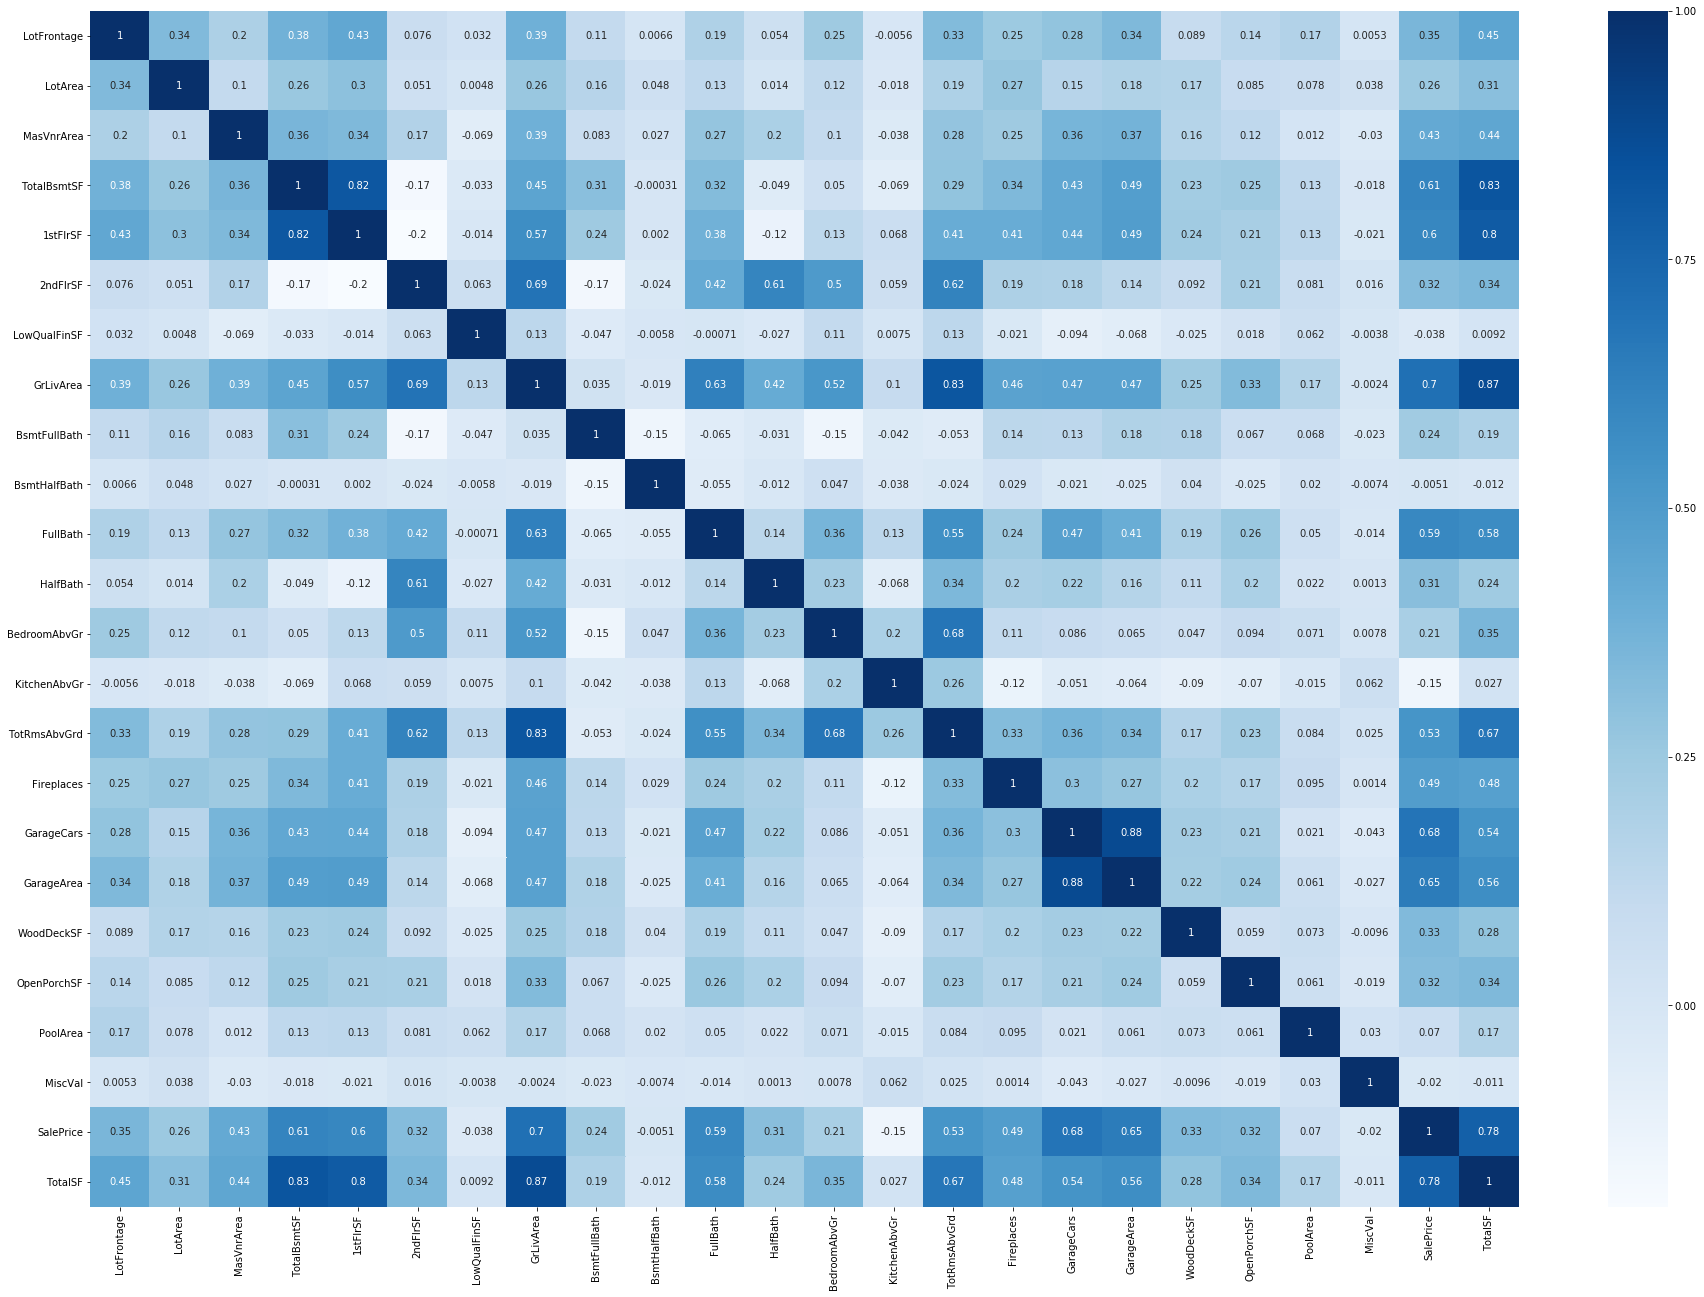

In [342]:
plt.figure(figsize = (32,22))        
ax = sns.heatmap(housing_data.corr(),annot = True,cmap="Blues")

## Inference

Based on above graph we can see that Multicollinearity still exists in various features.Will keep them for now and lets models(e.x. Regularization models such as Lasso, Ridge) do the clean up later on
- 83% correlation between TotRmsAbvGrd and GrLivArea.
- 88% correlation between GarageCars and GarageArea.

In [343]:
housing_data.shape

(1460, 62)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [344]:
housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition', 'SalePrice',
       'Age of Building', 'Age of Remodel', 'TotalSF'],
      dtype='object')

In [345]:
# split into X and y
X = housing_data.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition',
       'Age of Building', 'Age of Remodel', 'TotalSF']]

y = housing_data['SalePrice']

In [346]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_data_categorical = X.select_dtypes(include=['object'])
housing_data_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition,Age of Building,Age of Remodel
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Typ,No Fireplace,Attchd,RFn,OK,Y,WD,Normal,0-10,0-10
1,20,RL,Reg,Lvl,FR2,Gtl,Others,Feedr,Norm,1Fam,...,Typ,OK Fireplace,Attchd,RFn,OK,Y,WD,Normal,21-35,21-35
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Typ,OK Fireplace,Attchd,RFn,OK,Y,WD,Normal,0-10,0-10
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Typ,OK Fireplace,Detchd,Unf,OK,Y,WD,Abnorml,86-140,36-55
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Typ,OK Fireplace,Attchd,RFn,OK,Y,WD,Normal,0-10,0-10


In [347]:
# convert into dummies
housing_data_dummies = pd.get_dummies(housing_data_categorical, drop_first=True)
housing_data_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleCondition_Partial,Age of Building_11-20,Age of Building_21-35,Age of Building_36-60,Age of Building_61-85,Age of Building_86-140,Age of Remodel_11-20,Age of Remodel_21-35,Age of Remodel_36-55,Age of Remodel_56-140
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
# drop categorical variables 
X = X.drop(list(housing_data_categorical.columns), axis=1)

In [349]:
# concat dummy variables with X
X = pd.concat([X, housing_data_dummies], axis=1)

In [350]:
X.shape

(1460, 227)

In [351]:
# Divide the data into Numeric and categorical data  
col_numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_col = list(X.select_dtypes(col_numeric).columns)
print(num_col)

['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal', 'TotalSF']


In [352]:
# Numeric Data
numeric_data=X[list(X.select_dtypes(col_numeric).columns)]

# Using StandardScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = StandardScaler()

numeric_data[num_col] = scaler.fit_transform(numeric_data[num_col])
numeric_data.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,TotalSF
0,-0.23,-0.21,0.51,-0.46,-0.79,1.16,-0.12,0.37,1.11,-0.24,...,-0.21,0.91,-0.95,0.31,0.35,-0.75,0.22,-0.07,-0.09,-0.00
1,0.44,-0.09,-0.57,0.47,0.26,-0.80,-0.12,-0.48,-0.82,3.95,...,-0.21,-0.32,0.60,0.31,-0.06,1.63,-0.70,-0.07,-0.09,-0.05
2,-0.10,0.07,0.33,-0.31,-0.63,1.19,-0.12,0.52,1.11,-0.24,...,-0.21,-0.32,0.60,0.31,0.63,-0.75,-0.07,-0.07,-0.09,0.17
3,-0.45,-0.10,-0.57,-0.69,-0.52,0.94,-0.12,0.38,1.11,-0.24,...,-0.21,0.30,0.60,1.65,0.79,-0.75,-0.18,-0.07,-0.09,-0.11
4,0.62,0.38,1.37,0.20,-0.05,1.62,-0.12,1.30,1.11,-0.24,...,-0.21,1.53,0.60,1.65,1.70,0.78,0.56,-0.07,-0.09,0.94


In [353]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [354]:
# list of alphas to tune
params = {'alpha': [ 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 5.0, 10.0, 15.0, 30.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 5.0, 10.0,
                                   15.0, 30.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [355]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=200]
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01,0.00,0.00,0.00,0.20,{'alpha': 0.2},-0.09,-0.10,-0.10,-0.10,...,-0.10,0.00,9,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
1,0.00,0.00,0.00,0.00,0.30,{'alpha': 0.3},-0.09,-0.10,-0.11,-0.10,...,-0.10,0.00,10,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
2,0.01,0.00,0.00,0.00,0.40,{'alpha': 0.4},-0.09,-0.10,-0.11,-0.10,...,-0.10,0.00,8,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
3,0.01,0.00,0.00,0.00,0.60,{'alpha': 0.6},-0.09,-0.10,-0.11,-0.09,...,-0.10,0.01,7,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
4,0.01,0.00,0.00,0.00,0.80,{'alpha': 0.8},-0.09,-0.10,-0.11,-0.09,...,-0.10,0.01,6,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00


In [356]:
model_cv_ridge.best_params_

{'alpha': 10.0}

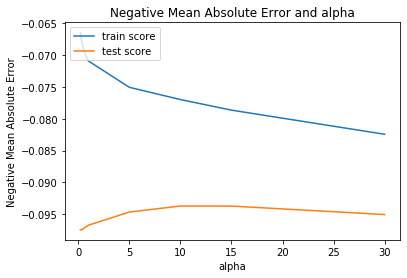

In [357]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
#plt.vlines(x=16,ymax=-0.065,ymin=-0.10,color="purple",linestyles="--")
#plt.hlines(y=-0.079,xmax=30,xmin=0,color="grey",linestyles="--")
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [358]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [359]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

cols = X.columns
cols = cols.insert(0, "constant")

final_ridge = list(zip(cols, model_parameters))

# create DataFrame using data 
predictor_housing_ridge = pd.DataFrame(final_ridge, columns =['Feature Name', 'Coefficient'])
predictor_housing_ridge.sort_values(['Coefficient'],ascending = False).head(15)


,Feature Name,Coefficient
0,constant,11.16
104,OverallQual_9,0.13
103,OverallQual_8,0.09
55,Neighborhood_Crawfor,0.09
63,Neighborhood_NridgHt,0.09
185,CentralAir_Y,0.08
68,Neighborhood_Somerst,0.07
40,MSZoning_RL,0.07
38,MSZoning_FV,0.07
9,BsmtFullBath,0.06


In [378]:
# Model with optimal alpha - Ridge regression

# predict
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

#Calculate R2 score
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.8725503815519312


## Ridge - Changes in the model incase of double the value of alpha

In [361]:
alpha_double = 20
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [362]:
# ridge model parameters
model_parameters_ridge_2 = list(ridge_double.coef_)
model_parameters_ridge_2.insert(0, ridge_double.intercept_)
model_parameters_ridge_2 = [round(x, 3) for x in model_parameters_ridge_2]

cols = X.columns
cols = cols.insert(0, "constant")

final_ridge = list(zip(cols, model_parameters_ridge_2))

# create DataFrame using data 
predictor_housing_ridge = pd.DataFrame(final_ridge, columns =['Feature Name', 'Coefficient'])
predictor_housing_ridge.sort_values(['Coefficient'],ascending = False).head(15)

,Feature Name,Coefficient
0,constant,11.17
104,OverallQual_9,0.10
103,OverallQual_8,0.08
63,Neighborhood_NridgHt,0.07
55,Neighborhood_Crawfor,0.07
185,CentralAir_Y,0.07
68,Neighborhood_Somerst,0.06
9,BsmtFullBath,0.06
172,BsmtExposure_Gd,0.06
17,GarageCars,0.05


In [377]:
# Model with double alpha - Ridge regression

# predict
y_train_pred = ridge_double.predict(X_train)
y_test_pred = ridge_double.predict(X_test)

#Calculate R2 score
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.8685379332628347


## Inferences
- Model Complexity reduces, hence R square valure is also reduced.
- Coefficient value is also reduced.

## Lasso Regression

In [364]:
# list of alphas to tune
params = {'alpha': [0.0001,0.0009,0.001,0.009]}

lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0009, 0.001, 0.009]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [365]:
model_cv_lasso.best_params_

{'alpha': 0.0001}

In [366]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.13,0.01,0.00,0.00,0.00,{'alpha': 0.0001},-0.09,-0.10,-0.10,-0.09,...,-0.09,0.01,1,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
1,0.08,0.01,0.00,0.01,0.00,{'alpha': 0.0009},-0.09,-0.10,-0.10,-0.09,...,-0.09,0.01,2,-0.08,-0.07,-0.08,-0.08,-0.08,-0.08,0.00
2,0.09,0.00,0.00,0.00,0.00,{'alpha': 0.001},-0.09,-0.10,-0.10,-0.09,...,-0.09,0.01,3,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,0.00
3,0.07,0.00,0.00,0.00,0.01,{'alpha': 0.009},-0.11,-0.13,-0.13,-0.11,...,-0.12,0.01,4,-0.11,-0.11,-0.11,-0.11,-0.11,-0.11,0.00


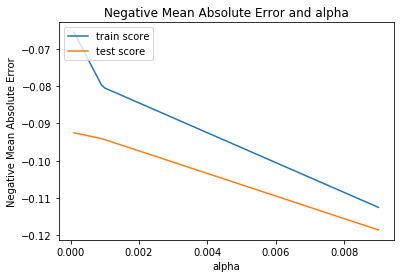

In [367]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [368]:
alpha =0.001

lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [370]:
# lasso model parameters generation
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")

final_lasso = list(zip(cols, model_parameters))

# create DataFrame using data 
predictor_housing_lasso = pd.DataFrame(final_lasso, columns =['Feature Name', 'Coefficient'])
predictor_housing_lasso.sort_values(['Coefficient'],ascending = False).head(15)

,Feature Name,Coefficient
0,constant,11.20
104,OverallQual_9,0.20
9,BsmtFullBath,0.10
63,Neighborhood_NridgHt,0.10
40,MSZoning_RL,0.10
185,CentralAir_Y,0.10
196,FireplaceQu_OK Fireplace,0.10
103,OverallQual_8,0.10
71,Condition1_Norm,0.10
17,GarageCars,0.10


In [376]:
# predict
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate R2 score
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.8656839569765209


## Changes in the model incase of double the value of alpha

In [372]:
alpha_double =0.002

lasso_double = Lasso(alpha=alpha_double)        
lasso_double.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [379]:
# lasso model parameters generation
model_parameters_2 = list(lasso_double.coef_)
model_parameters_2.insert(0, lasso_double.intercept_)
model_parameters_2 = [round(x, 1) for x in model_parameters_2]

cols = X.columns
cols = cols.insert(0, "constant")

final_lasso_2 = list(zip(cols, model_parameters_2))

# create DataFrame using data 
predictor_housing_lasso_2 = pd.DataFrame(final_lasso_2, columns =['Feature Name', 'Coefficient'])
predictor_housing_lasso_2.sort_values(['Coefficient'],ascending = False).head(15)

,Feature Name,Coefficient
0,constant,11.20
104,OverallQual_9,0.20
17,GarageCars,0.10
103,OverallQual_8,0.10
71,Condition1_Norm,0.10
68,Neighborhood_Somerst,0.10
63,Neighborhood_NridgHt,0.10
55,Neighborhood_Crawfor,0.10
185,CentralAir_Y,0.10
196,FireplaceQu_OK Fireplace,0.10


In [375]:
# lasso regression

# predict
y_train_pred = lasso_double.predict(X_train)
y_test_pred = lasso_double.predict(X_test)

# Calculate R2 score
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.8542148288710969


## Inferences
- **On increasing alpha (2x) value**
  - more features have a coefficient of 0. (Compare the dataframe **predictor_housing_lasso_2 vs predictor_housing_lasso**)
  - The model complexity reduces.

# Summary

**Which variables are significant in predicting the price of a house**

- Based on Lasso Regression Model - 
  - OverallQual_9	          
  - BsmtFullBath	          
  - Neighborhood_NridgHt	  
  - MSZoning_RL	            
  - CentralAir_Y	          
  - FireplaceQu_OK Fireplace
  - OverallQual_8	          
  - Condition1_Norm	        
  - GarageCars	            
  - Exterior1st_BrkFace	    

- Based on the Ridge Regression Model
  - OverallQual_9	       
  - OverallQual_8	       
  - Neighborhood_Crawfor	
  - Neighborhood_NridgHt	
  - CentralAir_Y	       
  - Neighborhood_Somerst	
  - MSZoning_RL	         
  - MSZoning_FV	         
  - BsmtFullBath	       
  - BsmtExposure_Gd	     


**How well those variables describe the price of a house.**

Yes, the above variables describe the price of house well. 
**Example** Boxplot of Neighborhood with Sale Price clearly states that price are higher if Neighborhood is "Northridge Heights"
- Price of House depends on the the **overall material and finish of the House**
- If neighborhood is "Northridge Heights" then the price of house is high.
- People prefer Central Air Conditioning while buying the House
- People prefer resident with Low Density

**Determine the optimal value of lambda for ridge and lasso regression**
- Lasso - 0.001
- Ridge - 10